# **📅 Training & Regularization Concepts**

# 1. **Overfitting vs Underfitting**

## 🧠 Underfitting (High Bias, Low Variance)

- Happens when your model is too simple to capture underlying patterns in the data. Think trying to fit a straight line on a clearly curvy dataset. You end up with poor performance on both training and test data.
- Metrics: You'll see high error on training, and validation/test error also high. It's biased, rigid.
- Why it happens:
    - Oversimplified model (e.g. linear reg for nonlinear relationship)
    - Insufficient features or poor feature design
    - Too much regularization choking flexibility
    - Not enough data or poor preprocessing.
- Example: Predicting house prices with only square footage ignoring bedrooms, location, etc. Leads to bad fit everywhere.


## 🤯 Overfitting (Low Bias, High Variance)

- Your model is way too flexible, leaning into every little quirk and noise in the training data. It nails the training set but fails miserably on unseen data.
- Metrics: Low training error, but validation/test error spikes. There's a big gap indicating it's memorizing.
- Why it happens:
    - Too many parameters or those fancy deep nets on small/noisy data
    - High-dimensional feature space (curse of dimensionality)
    - Too complex model structure
    - Missing or poor regularization.
- Example: A medical image classifier trained on tiny dataset that learns noise/artifacts not actual disease markers and bombs on new medical scans.

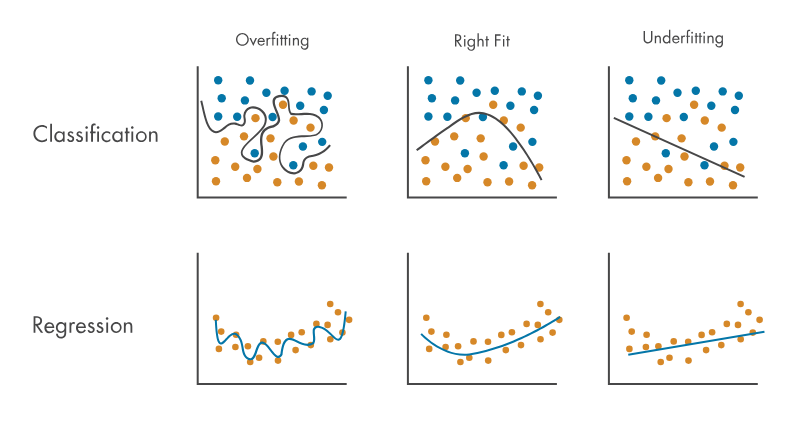

## 🔍 Bias–Variance Tradeoff

- **Bias**: error from wrong assumptions or oversimplification → leads to underfitting.
- **Variance**: error from fluctuations in training data, capturing noise → leads to overfitting.
- Goal: find that sweet spot a model that’s complex enough to capture patterns (low bias) but not so complex that it memorizes noise (low variance).


## 📈 Learning Curves & Diagnostics

- **Underfitting**: Training and validation curves are both high in error floor.
- **Overfitting**: Training error keeps dropping, validation error bottoms out then climbs.
- Visuals: Models like polynomial regressions show this vividly degree 1 underfits, degree too high overfits, middle ground fits just right.


## 🛠 Fixes & Prevention

### To prevent Underfitting:

- Use a more expressive model (e.g. move from linear to polynomial or tree-based)
- Engineer better or additional features
- Reduce regularization or retrain longer
- Add more/better data.

### To prevent Overfitting:

- Introduce regularization (L1, L2, dropout)
- Use early stopping (halt when validation starts worsening).
- Increase training dataset—data augmentation or collection
- Use cross validation (hold-out sets or k-fold).
- Prune tree based models or reduce feature count
- Ensemble methods (bagging, boosting) to reduce variance.


## 🧾 Quick Compare Table

| **Aspect** | **Underfitting** | **Overfitting** |
| --- | --- | --- |
| **Model Complexity** | Too simple; cannot capture data patterns. | Too complex; memorizes noise and fluctuations. |
| **Training Error** | High (model doesn’t even perform well on training data). | Very low (model nails training data). |
| **Validation/Test Error** | High, close to training error. | Much higher than training error; big gap appears. |
| **Bias (Error from wrong assumptions)** | High bias (oversimplified model). | Low bias (model captures details—even irrelevant ones). |
| **Variance (Error from sensitivity to data)** | Low variance (model predictions are stable but wrong). | High variance (predictions swing wildly across datasets). |
| **Learning Curve Behavior** | Training and validation error both plateau at high values. | Training error keeps decreasing, validation error decreases then increases. |
| **Data Size Impact** | More data usually doesn’t help (problem is model simplicity). | More data can reduce overfitting by providing broader patterns. |
| **Cause** | Model is underpowered: - Not enough features- Too much regularization- Oversimplified algorithms (e.g. linear reg for nonlinear data). | Model is overpowered: - Too many parameters- Trains too long- No regularization- Small/noisy dataset. |
| **Examples** | Predicting housing prices with only square footage.Linear regression on nonlinear trends. | Deep neural net memorizing 100 images.Decision tree grown too deep on noisy data. |
| **Real-World Analogy** | Using a straight line to approximate a sine curve → always wrong. | Memorizing answers for a test → score 100% in practice, fail real exam. |
| **Fix / Remedies** | - Use more complex model- Add relevant features- Reduce regularization- Train longer- Improve feature engineering. | - Add regularization (L1, L2, dropout)- Early stopping- Use cross-validation- Get more training data- Prune models (trees)- Use ensembling (bagging/boosting). |

## 💡 Real-World Examples

- Underfit analog: using a straight linear reg line for clearly curved data (like cosine or house prices with many variables) → bad everywhere.
- Overfit analog: crazy deep neural nets memorizing every training case noise stock price prediction overfitting trends that don’t recur, medical image quirks.


### 📝 Summary

- Underfitting = model too dumb → fails on both train and test.
- Overfitting = model too smart in the wrong way → kills train, bombs test.
- You want just right complex enough to learn patterns but simple enough to generalize. 

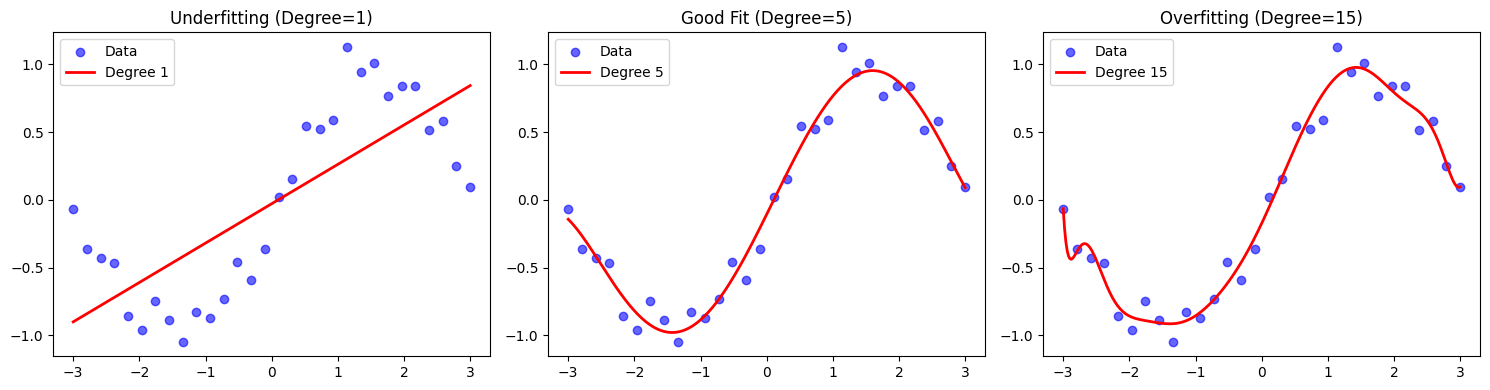

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset (nonlinear)
np.random.seed(42)
X = np.linspace(-3, 3, 30).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.15, size=X.shape)  # noisy sine curve

# Function to fit polynomial regression
def poly_fit_plot(degree, ax, title):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predictions
    X_test = np.linspace(-3, 3, 300).reshape(-1, 1)
    y_pred = model.predict(poly.transform(X_test))

    # Plot
    ax.scatter(X, y, color="blue", label="Data", alpha=0.6)
    ax.plot(X_test, y_pred, color="red", linewidth=2, label=f"Degree {degree}")
    ax.set_title(title)
    ax.legend()

# Plotting Underfitting, Good Fit, Overfitting
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

poly_fit_plot(1, axs[0], "Underfitting (Degree=1)")
poly_fit_plot(5, axs[1], "Good Fit (Degree=5)")
poly_fit_plot(15, axs[2], "Overfitting (Degree=15)")

plt.tight_layout()
plt.show()


## Explanation

- numpy: to generate synthetic data.

- matplotlib: for plotting graphs.

- PolynomialFeatures: creates polynomial terms (x, x², x³…) from raw input features.

- LinearRegression: basic regression model from scikit-learn.

- mean_squared_error: imported but not used here (you could use it to check error numerically).

- Creates 30 evenly spaced points between -3 and 3.

- Target values y are generated using sin(x) with added noise (to mimic real-world messy data).

- So the true underlying relationship is sinusoidal, not linear.

- PolynomialFeatures transforms X into [1, x, x², x³, ...] up to chosen degree.

- A linear regression is then trained on these polynomial features.

- Example:

    - degree=1 → straight line.

    - degree=5 → curve with 5th-order polynomial.

    - degree=15 → very flexible, can wiggle through almost every point.

- Creates 300 smooth points for plotting the regression curve.

- Predicts values using the trained polynomial model.

- Blue scatter = real noisy dataset.

- Red line = polynomial regression curve.

- Title and legend explain what you’re looking at.


## 💡 Insights from This Visualization

- Underfitting (Degree=1):
    - The red line is almost straight.

    - Doesn’t capture the sine wave shape at all.

    - Both training and test performance would be poor → high bias.

- Good Fit (Degree=5):
    - The curve bends with the data, smooth but not over-complicated.

    - Captures underlying trend without chasing random noise.

    - This is the sweet spot → balance between bias and variance.
        
- Overfitting (Degree=15):
    - The curve twists and bends aggressively to hit almost every noisy point.

    - Training error would be near-zero, but test error would blow up.

    - Classic high variance case → poor generalization.
 
---

## 📉 Training loss vs validation loss curves.


## 📌 What Is Training Loss?

- Definition: The error measured on the training dataset during model learning typically evaluated batch-by-batch. The optimizer uses this to update model weights.
  
- Behavior: Should decrease steadily as the model learns patterns in the data.

  
- Role: Responsibility of fitting the training data and guiding optimization.


## 📌 What Is Validation Loss?

- Definition: The error computed on a separate validation set not seen during training. Measured at the end of each epoch.
  
- Behavior: Helps evaluate how well the model generalizes to unseen data.

  
- Role: Used for hyperparameter tuning and decides when to stop training to prevent overfitting.
    
    
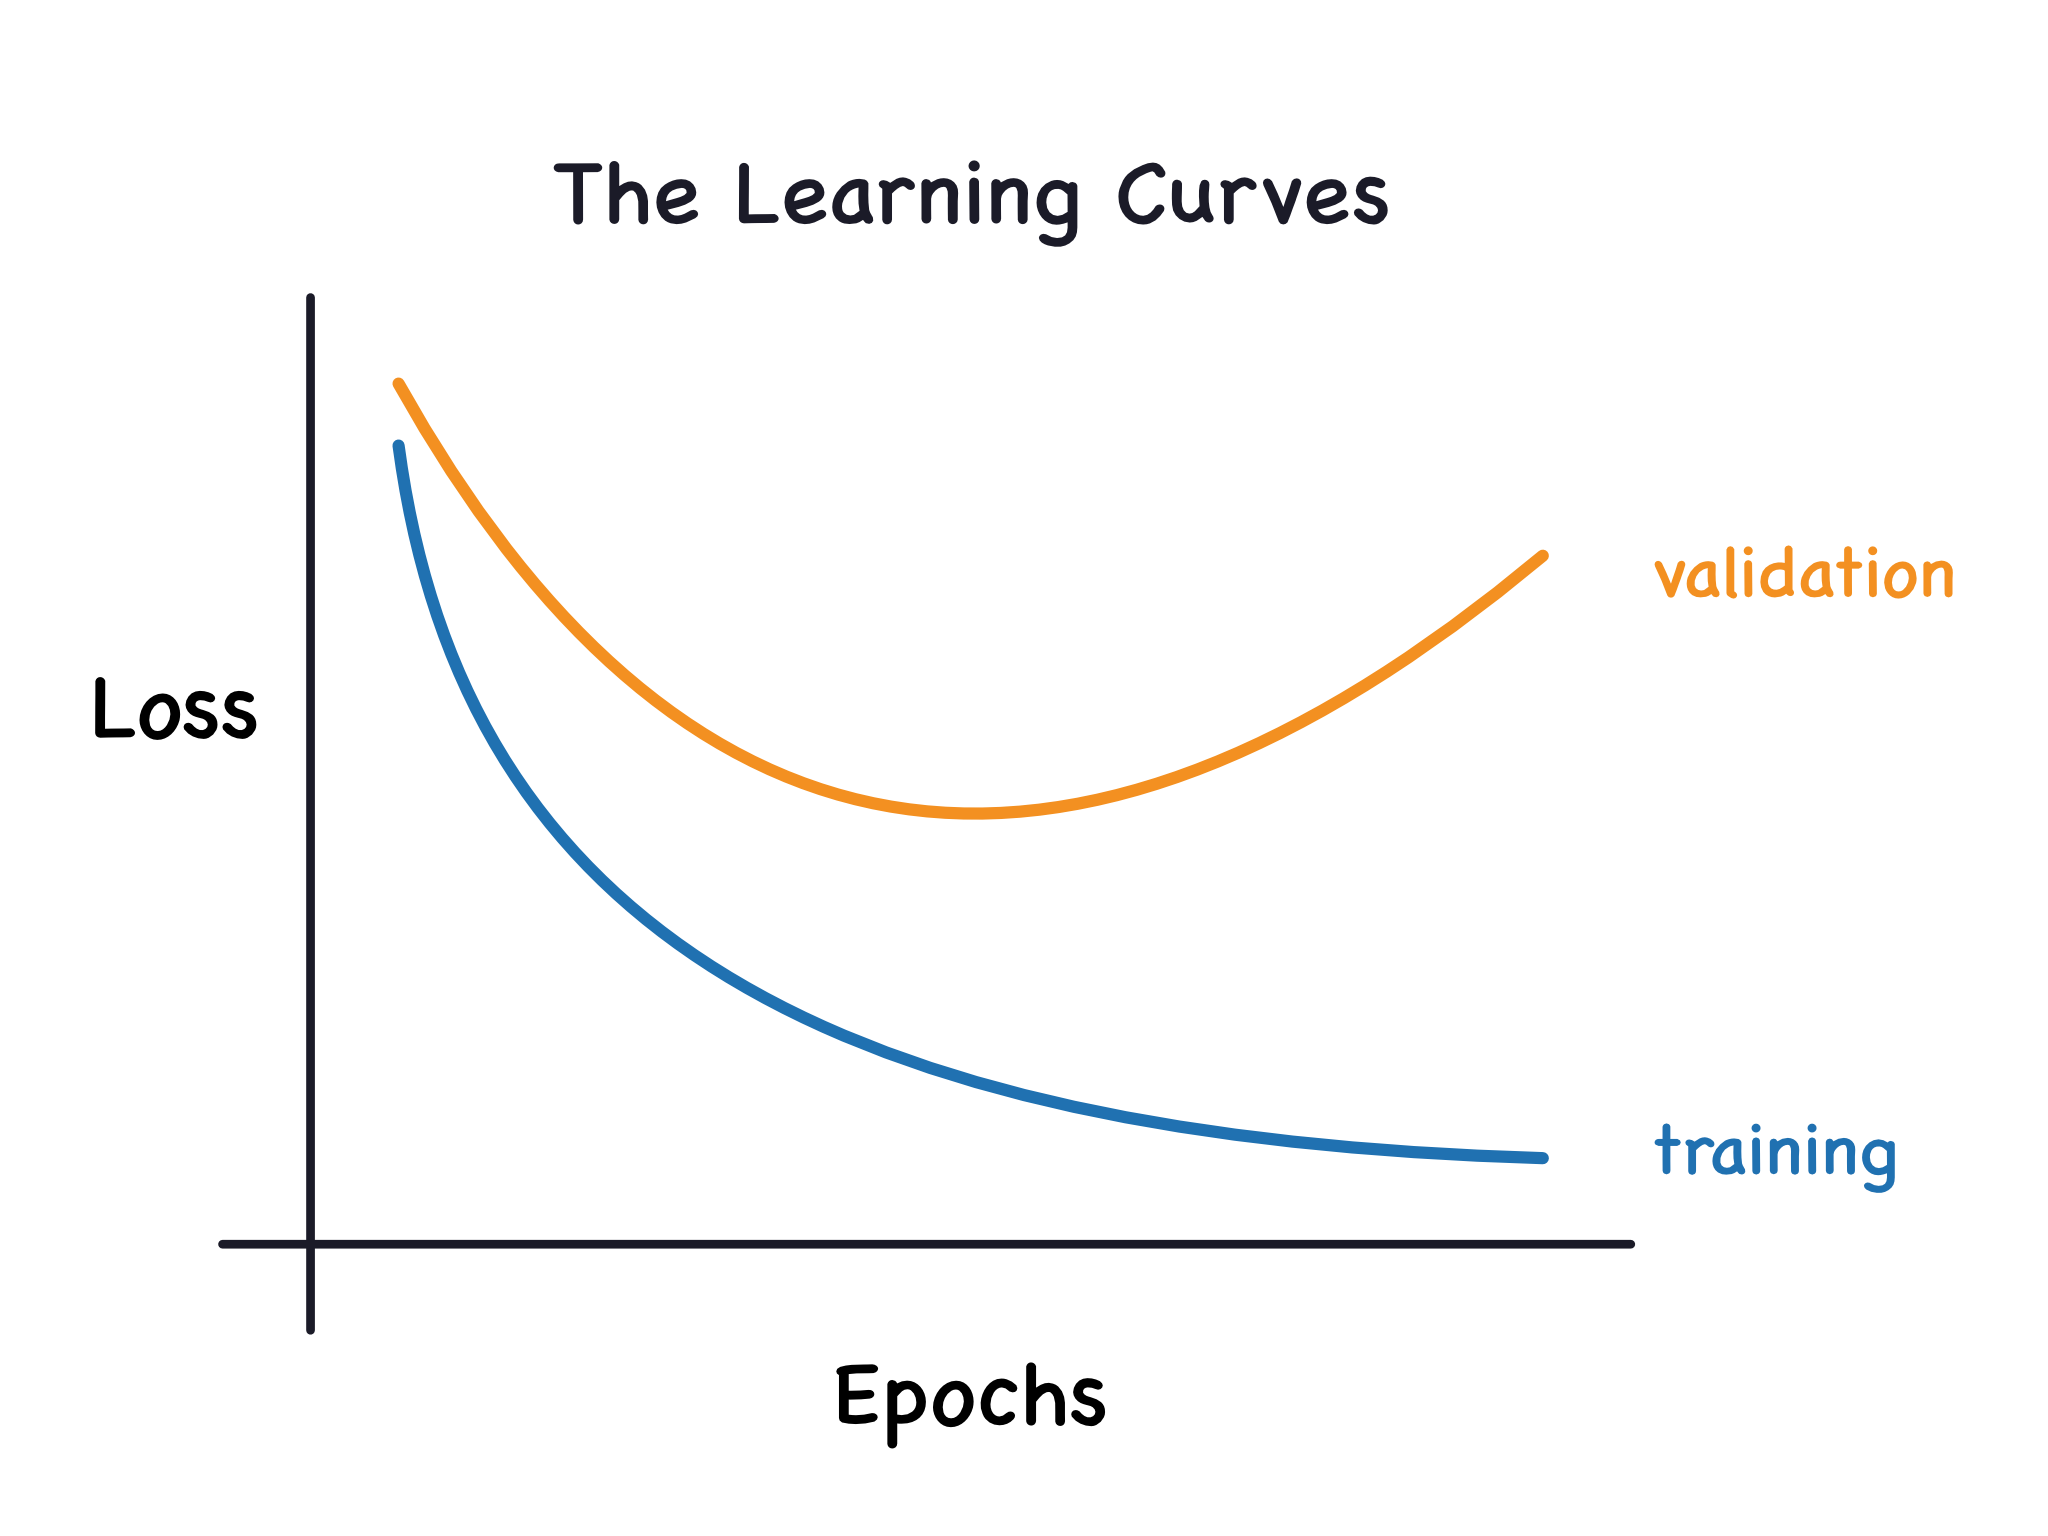

## 🧭 Why Track Both?

- Training loss alone can mask overfitting model might be doing great on training but fail elsewhere.
  
- Validation loss catches overfitting early by revealing rising error on unseen data.

  
- Together, they help diagnose model underfitting, overfitting, or sweet-spot generalization.
    
    

## 🔍 Typical Loss Curve Patterns

### 1. Good Fit (Ideal)

- Training loss and validation loss both decrease over time and plateau close together.
  
- Small gap = minimal generalization error → model generalizes well.

  
- Continued training beyond this point risks slipping into overfitting.
    
    

### 2. Underfitting

- Both training and validation loss remain high and flatten out early.
  
- Indicates the model is too simple or not learning effectively.
  
- Fixes: increase model capacity, train longer, reduce regularization, add features.
    
    

### 3. Overfitting

- Training loss continues dropping, even to near zero.
  
- Validation loss decreases initially but then reverses and starts rising.

  
- Gap widens: model memorizes noise and stops generalizing.

  
- Fixes: early stopping, regularization (L1/L2/dropout), more data, simplification.
    
    


## 🛠 Diagnosing

### 1. Early Stopping

- Monitor validation loss if it doesn’t improve for N epochs (patience), stop training.
  
- Restores best weights to avoid after-overtraining degradation.
    
    

### 2. Regularization Techniques

- Add L1/L2 penalties, dropout layers to discourage weight over-dependence.
  
- Simplify architecture (fewer layers/neurons).
    
    

### 3. Data Strategies

- More/better training data or augmentation to improve generalization.
  
- Ensure validation set is representative and free from data leakage or duplicates.
    
    

### 4. Hyperparameter Tuning

- Use validation loss curves to guide epoch count, learning rate schedules, or regularization strength.
  
- Validate hyperparameter choices via cross-validation for robustness.
    
    

## 📚 Summary Table of Loss Curve Scenarios

| **Scenario** | **Training Loss Behavior** | **Validation Loss Behavior** | **Diagnosis** | **Fix / Recommendation** |
| --- | --- | --- | --- | --- |
| Good Fit | Decreases and plateaus low | Decreases and plateaus close by | Optimal model | Stop training, minor hyper-tuning |
| Underfitting | High and flat | High and flat, mirrors train | Model too weak | Increase capacity, train longer, reduce regularization |
| Overfitting | Very low | Drops then rises | Model too complex, memorizing noise | Early stopping, regularization, add data |


## 💡 Pro Insights

- A small but consistent gap between training and validation loss is expected perfect alignment is rare.
  
- If validation loss is lower than training loss check for data leakage or an easier validation distribution.
    
- Watch out for oscillating or exploding loss curves may signal bad learning rate or corrupt data. Fix by cleaning data or reducing learning rate.
    
    

## 🧠 Summary

- Training loss shows how well your model fits the training set.
  
- Validation loss is the truth-check it tells you if the model generalizes.

  
- By analyzing both, you diagnose underfitting or overfitting early and apply targeted fixes like early stopping, regularization, tuning epochs, or improving data.

  
- Monitoring the shape, plateau, and divergence between the curves is your cheat-code to building robust deep learning models.


C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9121 - loss: 0.3003 - val_accuracy: 0.9573 - val_loss: 0.1418
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9567 - loss: 0.1445 - val_accuracy: 0.9712 - val_loss: 0.0952
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9668 - loss: 0.1092 - val_accuracy: 0.9742 - val_loss: 0.0867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9724 - loss: 0.0891 - val_accuracy: 0.9741 - val_loss: 0.0829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9741 - val_loss: 0.0819
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9795 - loss: 0.0651 - val_accuracy: 0.9768 - val_loss: 0.0767
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9810 - loss: 0.0583 - val_accuracy: 0.9769 - val_loss: 0.0809
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9826 - loss: 0.0552 

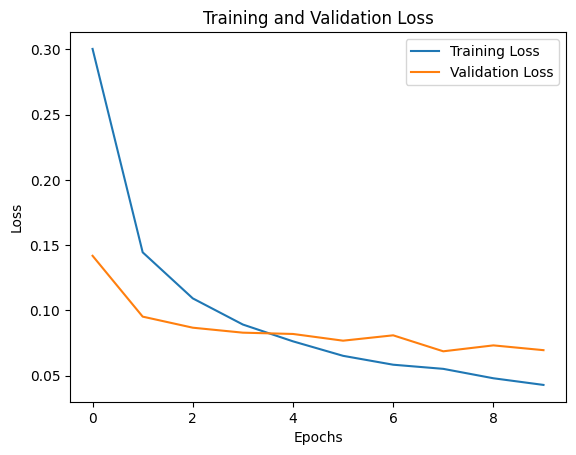

In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Building a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Flatten the 2D image into 1D
    layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model with loss function and optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with training and validation data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plotting Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Explanation

- tensorflow.keras: deep learning framework.

- layers: building blocks like Dense, Flatten, Dropout.

- models.Sequential: allows stacking layers in order.

- matplotlib.pyplot: to plot training/validation loss.

- MNIST = handwritten digits (0–9), grayscale, size 28×28.

- Dataset split into training (60k images) and testing (10k images).

- Pixel values originally range from 0–255.

- Dividing by 255 → values scaled into 0–1 range.

- Normalization helps training converge faster and more stably.

- Flatten: turns 28×28 image → 784-dimensional vector.

- Dense(128, relu): hidden layer, learns complex patterns.

- Dropout(0.2): randomly disables 20% of neurons during training → prevents overfitting.

- Dense(10, softmax): output layer, one probability per digit (0–9).

- Optimizer = Adam: efficient gradient descent variant.

- Loss = sparse_categorical_crossentropy: used for multi-class classification when labels are integers (0–9).

- Metrics = accuracy: track how well model is predicting.

- Trains for 10 epochs (passes over full dataset).

- Uses (x_test, y_test) as validation data → doesn’t affect training, only used to check generalization at each epoch.

- Returns history object, which contains logs (loss/accuracy for training and validation

## 💡 Insights: Training vs Validation Loss

- **Training Loss**:
    - How well the model fits the training data.
      
    - Should steadily decrease as epochs increase.
 
      
- **Validation Loss**:
    - How well the model generalizes to unseen data.
      
    - Ideally decreases too, but if it starts rising → overfitting.
 
---     

--- 

# 2. Bias-variance tradeoff ⚖️


It is important to understand prediction errors (bias and variance) when it comes to accuracy in any machine-learning algorithm. There is a tradeoff between a model’s ability to minimize bias and variance which is referred to as the best solution for selecting a value of Regularization constant. A proper understanding of these errors would help to avoid the overfitting and underfitting of a data set while training the algorithm.

## **🎯 What is Bias?**

Bias refers to the gap between a model’s predicted values and the actual outcomes. When bias is high, both training and testing errors become large. To avoid underfitting, algorithms should ideally maintain low bias. In cases of high bias, the model often produces predictions that follow a straight-line trend, failing to capture the true patterns in the dataset. This occurs when the hypothesis is overly simple or purely linear, leading to poor representation of the data. The graph below illustrates such a scenario.

- High bias = model too simple → consistently wrong.

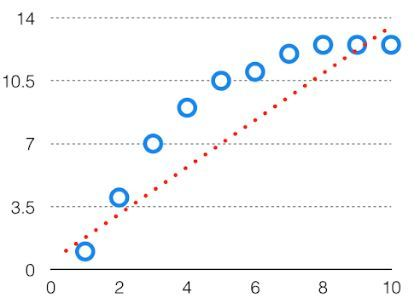

In such problem, a hypothesis looks like follows.

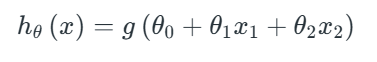

## **📈 What is Variance?**

Variance measures how much a model’s predictions fluctuate for a given data point, reflecting the spread of the data. A model with high variance fits the training data too closely, often capturing noise and small fluctuations. While it performs exceptionally well on the training set, it struggles with unseen data, resulting in high test errors. This situation is known as overfitting. Overfitting occurs when the model uses overly complex curves or high-order hypotheses to match the training data, but fails to generalize. To ensure good generalization, variance should be kept low during model training. The graph below illustrates high-variance data.

- High variance = model overreacts to noise → fits training idiosyncrasies.

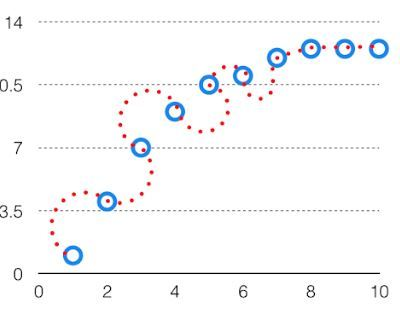

In such problem, a hypothesis looks like follows.

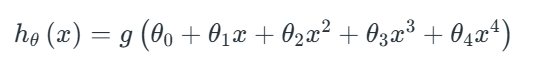

## **⚖️ Bias–Variance Tradeoff **

If a model is too simple (e.g., a linear hypothesis), it tends to have high bias and low variance, making it prone to errors on both training and test data. On the other hand, if a model is overly complex (e.g., a high-degree polynomial), it exhibits high variance and low bias, performing well on training data but poorly on new, unseen data. The balance between these extremes is called the bias–variance tradeoff. This tradeoff arises because a model cannot be both too simple and too complex simultaneously. The graph below illustrates an ideal point where this tradeoff is optimized.

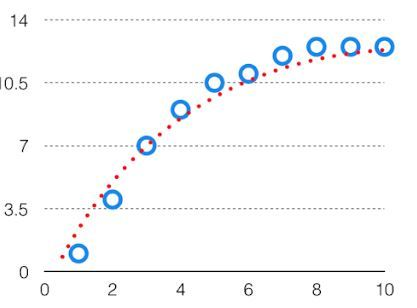

We try to optimize the value of the total error for the model by using the Bias-variance Tradeoff.

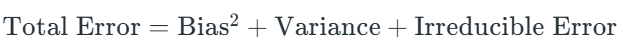

The best fit will be given by the hypothesis on the tradeoff point. The error to complexity graph to show trade-off is given as - 

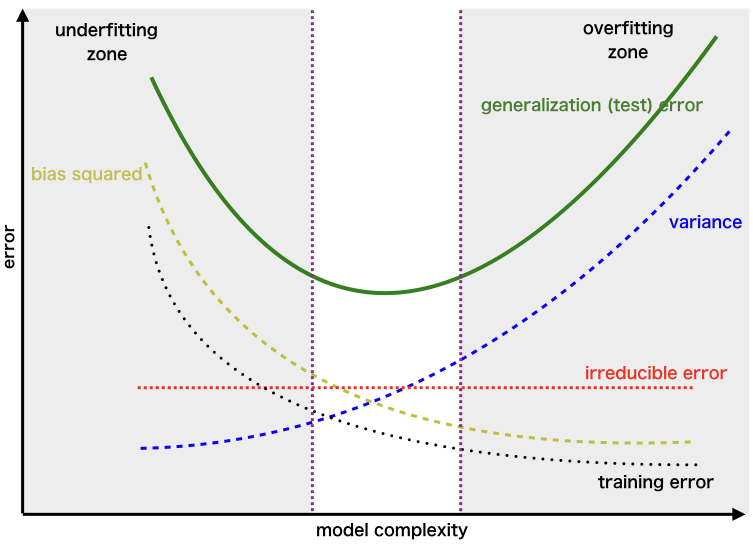

## 📊 Model Examples & Behavior

| **Model Type** | **Bias** | **Variance** | **Typical Behavior** |
| --- | --- | --- | --- |
| Linear Regression | High | Low | Underfitting; misses underlying nonlinear patterns |
| Decision Tree | Low | High | Overfits if not regularized/pruned |
| Random Forest / Bagging | Low | Lower | More stable; better generalization |




In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


- numpy: for numerical computations and generating synthetic data.

- matplotlib.pyplot: to plot graphs.

- PolynomialFeatures: transforms input features into polynomial terms to allow linear regression to fit non-linear data.

- LinearRegression: standard linear regression model.

- make_pipeline: chain preprocessing (like polynomial expansion) and the model into one pipeline.

- train_test_split: split dataset into training and testing sets.

In [31]:
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1,1)
y = X.ravel()**3 + np.random.randn(100)*9


- np.linspace(-3, 3, 100): creates 100 points from -3 to 3.

- reshape(-1,1): converts it to a 2D column vector because sklearn expects X in shape (n_samples, n_features).

- y = X.ravel()**3 + noise: cubic relationship + random noise.

    - This simulates a non-linear real-world problem.

    - np.random.randn(100)*9: Gaussian noise added to make it more realistic.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


- 70% training data, 30% test data.

- random_state=42 ensures reproducibility.

In [33]:
degrees = list(range(1,16))
train_error = []
test_error = []
bias2 = []
variance = []


- degrees: polynomial degrees (1–15) → controls model complexity.

- Lists will store train error, test error, bias², and variance for each degree.

In [27]:
n_runs = 100


- Number of runs for bias-variance decomposition.

- Why multiple runs? Bias-variance decomposition requires estimating variability across different noisy datasets.

In [28]:
for degree in degrees:
    y_preds_runs = []

    for run in range(n_runs):
        y_train_noisy = y_train + np.random.randn(len(y_train)) * 1.5
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train, y_train_noisy)
        y_preds_runs.append(model.predict(X_test))
    
    y_preds_runs = np.array(y_preds_runs)
    mean_preds = np.mean(y_preds_runs, axis=0)
    
    bias2.append(np.mean((y_test - mean_preds)**2))
    variance.append(np.mean(np.var(y_preds_runs, axis=0)))

    # Train & test errors
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    train_error.append(np.mean((y_train - model.predict(X_train))**2))
    test_error.append(np.mean((y_test - model.predict(X_test))**2))


- For each polynomial degree:

    - Add small noise to training targets (y_train_noisy) → simulates different datasets.

    - Train polynomial regression model.

    - Predict on test set.

    - Save predictions to calculate bias² and variance later.

- mean_preds: average prediction across all runs.

- bias² = mean squared difference between true y and mean prediction.

- variance = mean squared difference of predictions around mean prediction.

- This is the bias-variance decomposition in action.

- Fit model once on original data to get standard train and test error.

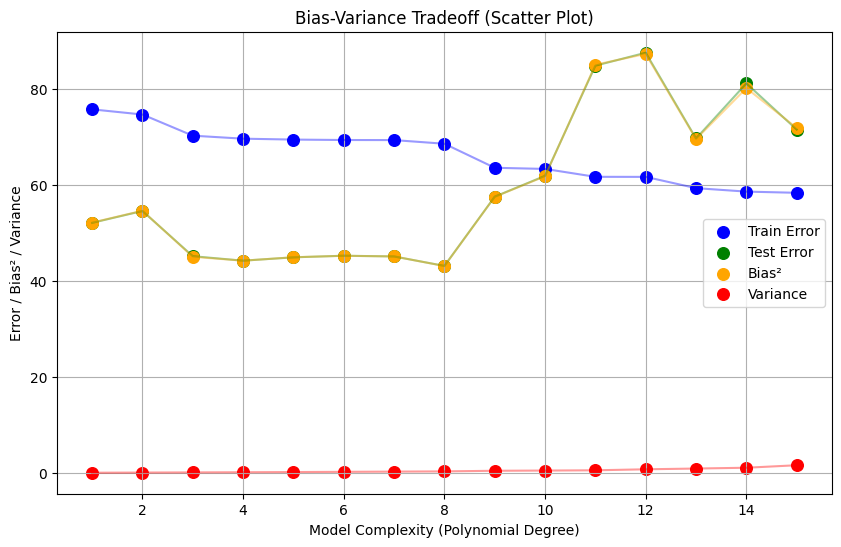

In [29]:
# 🔹 Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(degrees, train_error, color='blue', label='Train Error', s=70)
plt.scatter(degrees, test_error, color='green', label='Test Error', s=70)
plt.scatter(degrees, bias2, color='orange', label='Bias²', s=70)
plt.scatter(degrees, variance, color='red', label='Variance', s=70)

# Connect the dots for trends
plt.plot(degrees, train_error, color='blue', alpha=0.4)
plt.plot(degrees, test_error, color='green', alpha=0.4)
plt.plot(degrees, bias2, color='orange', alpha=0.4)
plt.plot(degrees, variance, color='red', alpha=0.4)

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error / Bias² / Variance')
plt.title('Bias-Variance Tradeoff (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()


### **What This Plot Shows**

1. **Low-degree polynomial**:
    - High bias (orange), low variance (red).

    - Underfitting → both train/test errors are high.

2. **Medium-degree polynomial**:
    - Bias decreases, variance still low.

    - Test error is minimized → sweet spot of complexity.

3. **High-degree polynomial**:
    - Variance increases sharply (red), bias is low.

    - Train error very low, but test error rises → overfitting.

✅ This scatter + line plot visually demonstrates the bias-variance tradeoff.

---

---

# 3. **Regularization techniques**

Regularization is a techniques used to reduce overfitting by incorporating a penalty term into the model's objective function during training. Its main goal is to prevent the model from fitting the training data too precisely, encouraging simpler models that generalize well to new, unseen data. By penalizing large coefficients or selecting only certain features, regularization helps control model complexity and achieve a better balance between bias and variance.

## 🤔 What is overfitting and underfitting? 

In machine learning, overfitting and underfitting are key factors that affect a model's accuracy and reliability. Overfitting happens when a model learns not only the underlying patterns but also the noise in the training data, causing it to perform poorly on new, unseen data. Underfitting, in contrast, occurs when a model is too simple to capture the true patterns in the data, leading to low performance on both training and test datasets.

**The Role of Regularization** 🛡️

Regularization is crucial for improving a model's ability to generalize. By reducing overfitting, it helps models perform better on unseen data, resulting in more dependable predictions. Moreover, regularization assists in feature selection and contributes to building interpretable models by highlighting the most important features for prediction.

## **Types of Regularization** 🧩

### **1. L1 Regularization (Lasso) 📝**

L1 regularization, also known as Lasso regression, is a powerful technique for preventing overfitting and performing feature selection in regression models. Standard regression can struggle with high-dimensional datasets that contain irrelevant features, leading to poor predictions and hard-to-interpret models. Lasso tackles this by adding a penalty term to the loss function, encouraging sparsity and focusing only on the most relevant predictors.

## How it works: 🔧

Lasso drives some coefficient estimates to exactly zero, effectively removing less important features. The penalty is proportional to the absolute values of the coefficients, discouraging large magnitudes and simplifying the model.

Objective Function:

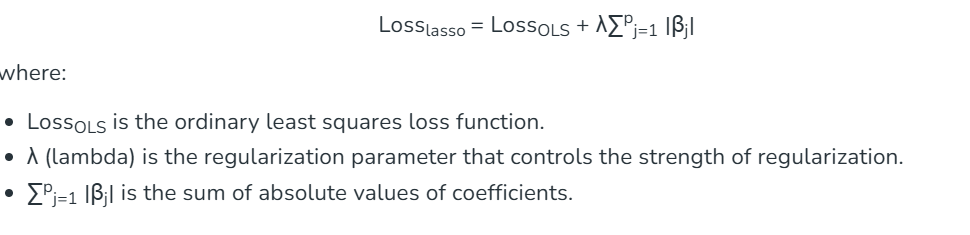

## Advantages:

- Efficiently handles datasets with many predictors.

- Automatically selects important features.

- Simplifies models, making them more interpretable

### **2. L2 Regularization (Ridge) 💪**


L2 regularization, or Ridge regression, is another method to reduce overfitting and enhance model generalization. It is particularly useful when predictors are highly correlated (multicollinearity), which can make coefficients unstable in traditional regression. Ridge solves this by adding a penalty proportional to the square of the coefficients, shrinking them without setting them exactly to zero.

### How it works: 🔧

By penalizing large coefficients, Ridge stabilizes the model, reduces sensitivity to small changes in the data, and balances the bias-variance trade-off.

Objective Function:

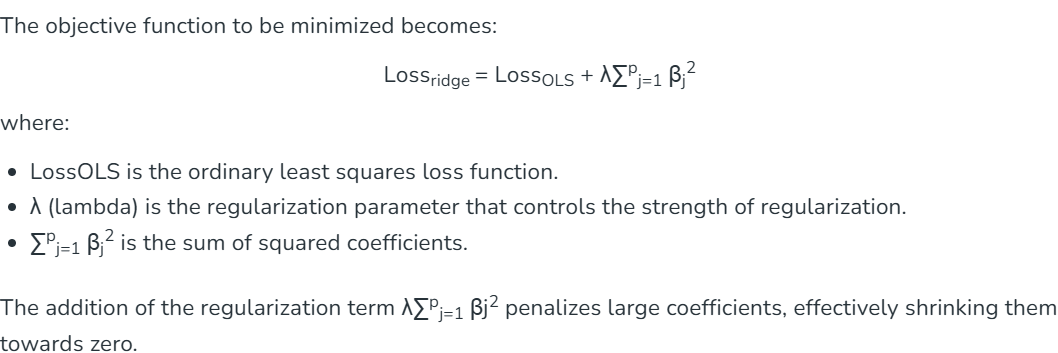

### Advantages:

- Handles multicollinearity effectively

- Produces stable and reliable coefficients

- Performs well when predictors outnumber observations


### **3. Elastic Net Regularization ⚡**


Elastic Net combines the strengths of Lasso (L1) and Ridge (L2) regression. It is ideal for high-dimensional datasets with multicollinearity, offering both feature selection and coefficient shrinkage.

### How it works: 🔧

Elastic Net adds both L1 and L2 penalties to the loss function, giving flexibility to control sparsity and shrinkage simultaneously. It balances the benefits of Lasso and Ridge while reducing their individual limitations.

Objective Function:

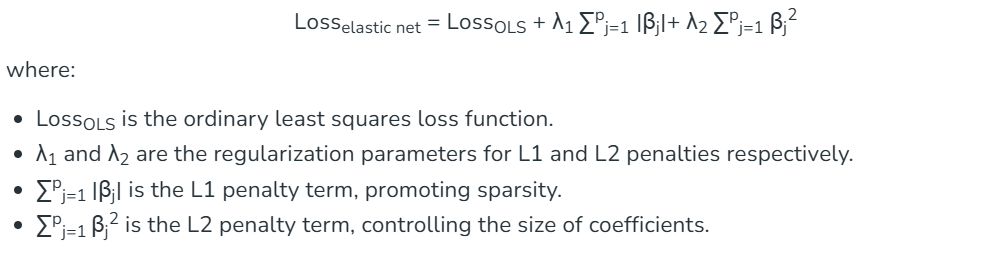

### Advantages:

- Efficiently handles complex, high-dimensional datasets

- Balances feature selection and coefficient shrinkage

- Produces robust, interpretable, and reliable models

---

## L1 vs L2 (weight decay) ⚖️

- L1 Regularization (Lasso): Adds the absolute value of the coefficients as a penalty to the loss function. This can shrink some coefficients to zero, effectively performing feature selection. 
  
- L2 Regularization (Ridge): Adds the squared value of the coefficients as a penalty to the loss function. This discourages large coefficients but doesn't necessarily set them to zero. 

### 🔑 Key Differences:

- Sparsity: L1 can produce sparse models by setting some weights to zero, while L2 tends to shrink weights evenly.
  
- Feature Selection: L1 is useful when we suspect that many features are irrelevant, as it can eliminate them.

  
- Computational Efficiency: L2 is generally more computationally efficient and stable.

### 🧠 When to Use:

- L1: When you have a large number of features and suspect only a few are important.
  
- L2: When you have many small/medium-sized effects and want to prevent any feature from dominating.

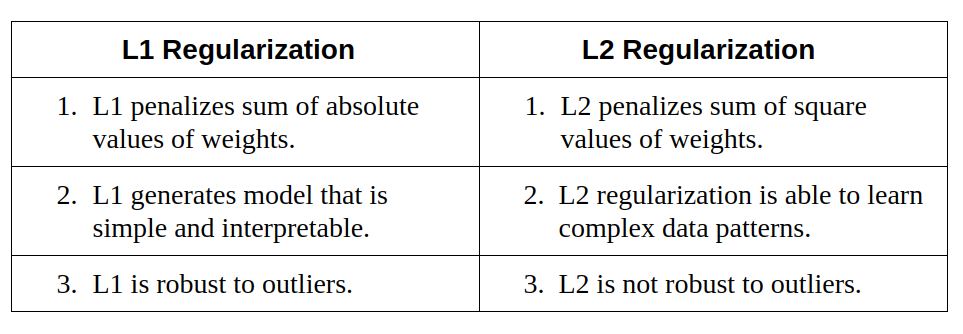

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [36]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(100)  # y = 4 + 3x + noise


- np.random.seed(42) → ensures reproducibility.

- X → 100 random numbers between 0 and 2. This is our feature/input.

- y → target/output based on a linear relation: 𝑦 = 4 + 3x +noise

- np.random.randn(100) adds random noise to simulate real-world data.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Splits the dataset into training (80%) and testing (20%) sets.

- random_state=42 ensures the split is consistent every run.

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


- Creates a baseline linear regression model.

- Fits it to training data.

- Predicts output for the test data.

In [39]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


- alpha=0.1 → controls the strength of L1 penalty. Higher alpha → more regularization → more coefficients pushed toward zero.

- Lasso performs feature selection by potentially zeroing coefficients.

In [40]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


- alpha=0.1 → controls L2 penalty. Higher alpha → more shrinkage.

- Ridge shrinks coefficients but never sets them exactly to zero.

In [41]:
print("MSE Linear Regression:", mean_squared_error(y_test, y_pred_lr))
print("MSE Lasso Regression (L1):", mean_squared_error(y_test, y_pred_lasso))
print("MSE Ridge Regression (L2):", mean_squared_error(y_test, y_pred_ridge))


MSE Linear Regression: 0.6536995137170021
MSE Lasso Regression (L1): 0.6584189249611411
MSE Ridge Regression (L2): 0.6527084375244316


- Calculates Mean Squared Error (MSE) on test data.

- Lower MSE → better model performance.

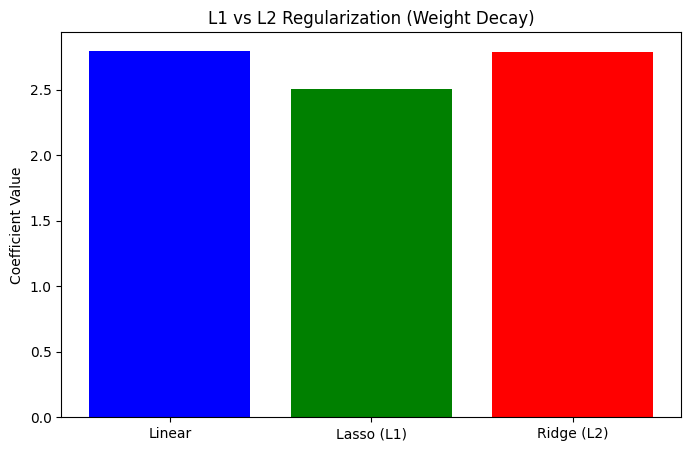

In [42]:
plt.figure(figsize=(8,5))
plt.bar(['Linear','Lasso (L1)','Ridge (L2)'],
        [lr.coef_[0], lasso.coef_[0], ridge.coef_[0]], color=['blue','green','red'])
plt.ylabel("Coefficient Value")
plt.title("L1 vs L2 Regularization (Weight Decay)")
plt.show()


- Plots the magnitude of the coefficient for each model.

- Helps visualize the effect of regularization:

    - Lasso (L1) → may reduce coefficient to zero

    - Ridge (L2) → shrinks coefficient, but stays non-zero

    - Linear → baseline coefficient without shrinkage
 
- Plot: Visually shows how regularization affects coefficient values.

---

##  Dropout (randomly dropping neurons) 🛑🧠

Dropout is a technique where, during training, randomly selected neurons are ignored or "dropped out." This prevents the network from becoming overly reliant on specific neurons, promoting redundancy and robustness. Dropout is implemented per-layer in various types of layers like dense fully connected, convolutional, and recurrent layers, excluding the output layer. The dropout probability specifies the chance of dropping outputs, with different probabilities for input and hidden layers that prevents any one neuron from becoming too specialized or overly dependent on the presence of specific features in the training data.

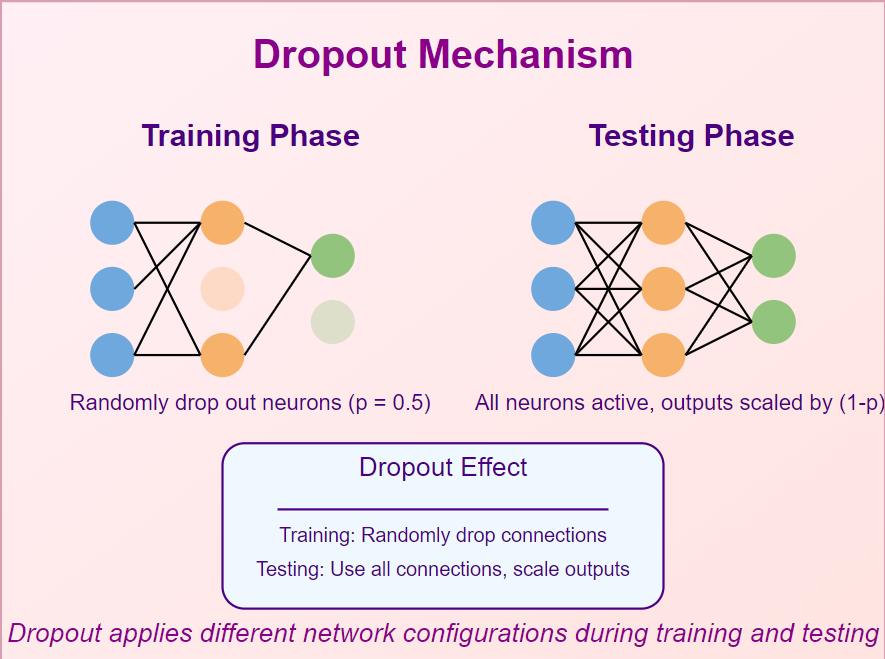

### ⚙️ How It Works:

- During each training iteration, a fraction of neurons is randomly set to zero.
  
- The remaining active neurons are scaled up to maintain the overall output magnitude.

### ✨ Benefits:

- Prevents Overfitting: By ensuring that the model doesn't rely too heavily on any single neuron.
  
- Improves Generalization: Helps the model generalize better to unseen data.

  
- Acts as an Ensemble: Each forward pass can be seen as a different "thinned" network, leading to a form of model averaging.

### 🧩 Dropout Implementation in Deep Learning Models

Implementing dropout regularization in deep learning models is a straightforward method that can significantly improve a neural network’s generalization ability.

Dropout is usually added as a separate layer following a fully connected (dense) layer in the network architecture. The dropout rate—the probability of dropping a neuron—is a hyperparameter that should be tuned for best results. A common starting point is 20%, which can be adjusted up to 50% depending on the model’s performance, with 20% serving as a reasonable baseline.

- In PyTorch, dropout is implemented using the torch.nn module.

- In Keras/TensorFlow, the tf.keras.layers.Dropout function is used to insert dropout into the model.

  
### 💻 Implementation:

- In frameworks like TensorFlow or PyTorch, dropout can be easily implemented by adding a dropout layer with a specified dropout rate (e.g., 0.5 means 50% of neurons are dropped).

### 🌟 Advantages of Dropout Regularization in Deep Learning 

- Prevents Overfitting : By randomly disabling neurons during training, the network cannot rely too heavily on specific connections, reducing overfitting.
  
- Ensemble Effect : Dropout effectively trains multiple “thinned” networks simultaneously. Each forward pass uses a slightly different network structure, which improves generalization on unseen data.

  
- Enhances Data Representation : Introducing random noise through dropout helps the network learn more robust representations, generating diverse training patterns and improving overall model effectiveness.


### ⚠️ Drawbacks of Dropout and How to Mitigate Them 

While dropout has many benefits, it also comes with challenges. Here’s a breakdown and strategies to address them:

1. Longer Training Times ⏱️
    - Randomly dropping units increases training duration.
      
    - Mitigation: Use powerful hardware, GPUs, or parallelize training when possible.
  
      
2. Optimization Complexity 🧠
    - The reason dropout works is not fully understood, making optimization tricky.
      
    - Mitigation: Experiment with dropout rates on smaller models first to find suitable values before scaling up.
  
      
3. Hyperparameter Tuning 🎛️
    - Dropout introduces additional hyperparameters like the dropout rate and learning rate.
      
    - Mitigation: Use systematic search strategies such as grid search or random search to optimize these parameters.
  
      
4. Redundancy with Batch Normalization 🔄
    - Batch normalization sometimes reduces the need for dropout.
      
    - Mitigation: Evaluate model performance with and without dropout to determine its necessity.
  
      
5. Increased Model Complexity 🏗️
    - Adding dropout layers increases architectural complexity.
      
    - Mitigation: Keep the model as simple as possible, ensuring each dropout layer contributes to validation performance.

By understanding these challenges and applying strategic mitigation techniques, dropout can be a valuable tool for improving model generalization while keeping drawbacks under control.

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


- TensorFlow/Keras: Framework for building and training neural networks.

- Sequential: Stack layers sequentially (simple feedforward model).

- Dense: Fully connected layer.

- Dropout: Regularization layer that randomly drops neurons.

- MNIST: Handwritten digits dataset.

- to_categorical: Converts labels into one-hot vectors for classification.

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


- MNIST images are 28x28 pixels → flattened into 784 features (28*28).

- Pixel values are normalized to 0–1 to speed up training.

- Labels are converted into one-hot vectors, e.g., digit 3 → [0,0,0,1,0,0,0,0,0,0].

In [48]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


- Layer 1: Dense with 512 neurons, ReLU activation.

- Dropout 0.5: 50% neurons randomly dropped → prevents overfitting.

- Layer 2: Dense with 256 neurons, ReLU.

- Dropout 0.3: 30% neurons dropped.

- Output Layer: 10 neurons (one per class), Softmax → probabilities for classification.

✅ Dropout layers here help generalize the network and reduce overfitting.

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


- Optimizer: Adam (adaptive learning rate).

- Loss: Categorical crossentropy → suitable for multi-class classification.

- Metrics: Accuracy tracked during training.

In [50]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8839 - loss: 0.3778 - val_accuracy: 0.9572 - val_loss: 0.1456
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9469 - loss: 0.1764 - val_accuracy: 0.9663 - val_loss: 0.1072
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9579 - loss: 0.1359 - val_accuracy: 0.9719 - val_loss: 0.0968
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9661 - loss: 0.1099 - val_accuracy: 0.9733 - val_loss: 0.0881
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9699 - loss: 0.0954 - val_accuracy: 0.9753 - val_loss: 0.0814
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9732 - loss: 0.0842 - val_accuracy: 0.9755 - val_loss: 0.0816
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9754 - loss: 0.0770 - val_accuracy: 0.9762 - val_loss: 0.0787
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9765 - loss: 0.0728 - val_acc

- Epochs: 10 full passes through the dataset.

- Batch size: 128 samples per gradient update.

- Validation split: 20% of training data used to monitor validation performance.

💡 During training, dropout is active only for training, not during validation.

In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9815 - loss: 0.0625
Test Accuracy: 0.9815000295639038


- Evaluates the model on unseen test data.

- Prints final accuracy (generalization performance).

## ️Key Insights

- Dropout prevents the network from overfitting by forcing neurons to not rely on specific activations.

- Validation accuracy can closely track training accuracy, showing good generalization.

- Adjusting dropout rates can balance between underfitting (too high) and overfitting (too low).

---

## 🔁 Data augmentation (images: flips, rotations).
    
### 🚀 **What is Data Augmentation?**
    
Data augmentation involves creating new, slightly altered copies of your training images to enhance the model’s robustness. This technique helps reduce overfitting and enables the model to better recognize patterns, even when images vary in orientation, brightness, or size.

**In short: more diverse data = better generalization.**

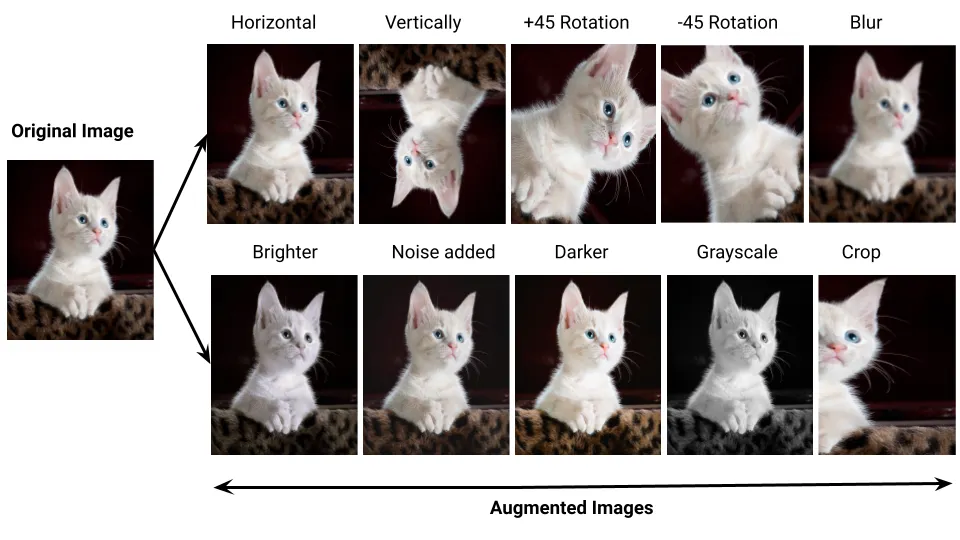

### 🔧 Common Techniques:

- Flipping:

    - Horizontally or vertically flipping images.
    - datagen = ImageDataGenerator(horizontal_flip=True)
  
- Rotation:

    - Rotating images by a certain angle.
    - datagen = ImageDataGenerator(rotation_range=15)

  
- Scaling:

    - Zooming in or out of images.
    - Teaches your model to recognize features at varying scale.

  
- Translation:

    - Shifting images along the X or Y axis.

  
- Color Jittering:

    - Randomly changing the brightness, contrast, or saturation of images.
    - datagen = ImageDataGenerator(brightness_range=[0.8, 1.2])


### 🌟 Benefits:

- Increases Dataset Size: Helps in training more robust models with limited data.
  
- Improves Generalization: Exposes the model to a wider variety of scenarios.

  
- Reduces Overfitting: By providing more varied examples, the model learns more general features.

### 💻 Implementation:

- In Keras, use the ImageDataGenerator class to apply these transformations on the fly during training.

- You can combine multiple transformations for even richer augmented datasets.

C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 64s 163ms/step - accuracy: 0.1145 - loss: 2.2974 - val_accuracy: 0.1182 - val_loss: 2.2900
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 179ms/step - accuracy: 0.1174 - loss: 2.2921 - val_accuracy: 0.1211 - val_loss: 2.2861
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 193ms/step - accuracy: 0.1201 - loss: 2.2891 - val_accuracy: 0.1206 - val_loss: 2.2866
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 202ms/step - accuracy: 0.1200 - loss: 2.2869 - val_accuracy: 0.1216 - val_loss: 2.2820
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 95s 253ms/step - accuracy: 0.1204 - loss: 2.2847 - val_accuracy: 0.1228 - val_loss: 2.2816
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 121s 197ms/step - accuracy: 0.1204 - loss: 2.2838 - val_accuracy: 0.1210 - val_loss: 2.2806
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 195ms/step - accuracy: 0.1213 - loss: 2.2828 - val_accuracy: 0.1229 - val_loss: 2.2794
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 178ms/step - accuracy: 0.1204 - loss: 

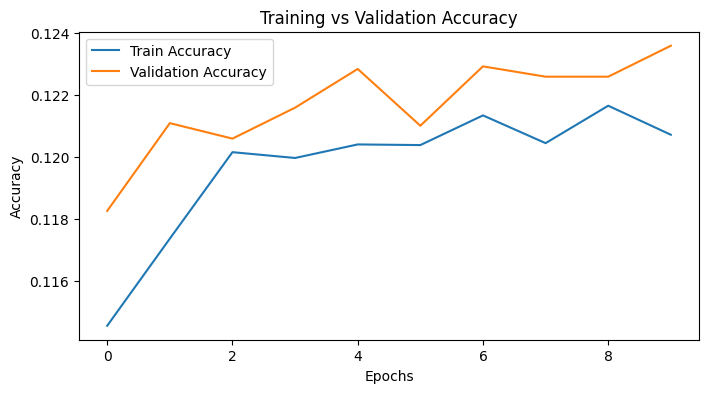

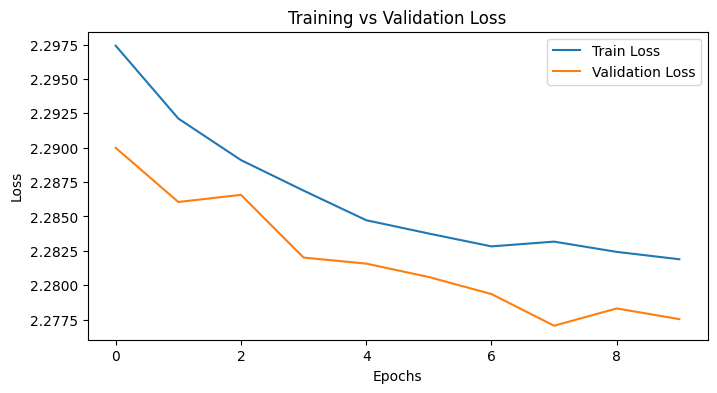

In [53]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images to (num_samples, height, width, channels) for ImageDataGenerator
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,         # Rotate images by ±15 degrees
    width_shift_range=0.1,     # Shift horizontally by 10%
    height_shift_range=0.1,    # Shift vertically by 10%
    zoom_range=0.1,            # Zoom in/out by 10%
    horizontal_flip=False,     # MNIST is digits, horizontal flip not needed
    brightness_range=[0.8,1.2],# Random brightness adjustment
    validation_split=0.2       # Use 20% of training as validation
)

# Fit the generator (required for some datasets)
datagen.fit(x_train)

# Build the model
model = Sequential([
    Flatten(input_shape=(28,28,1)),   # Flatten to 784 features
    Dense(512, activation='relu'),
    Dropout(0.5),                     # 50% dropout
    Dense(256, activation='relu'),
    Dropout(0.3),                     # 30% dropout
    Dense(10, activation='softmax')    # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using augmented data
batch_size = 128
epochs = 10
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size, subset='training'),
    validation_data=datagen.flow(x_train, y_train, batch_size=batch_size, subset='validation'),
    epochs=epochs
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training & validation accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## ✅ Insights

- Data Augmentation + Dropout → reduces overfitting.

- Flatten → Dense → Dropout → Dense → Output → standard fully connected architecture.

- Softmax output → multi-class probability distribution.

- Training with augmented data is slower because transformations are applied in real-time.

- Visual plots are crucial to monitor model convergence and decide if more epochs are needed.

---

## Early stopping

Early stopping is a regularization method that halts training once the model shows signs of overfitting. Its goal is to prevent the model from excelling on the training data while performing poorly on unseen data, such as the validation set. Training is terminated when the model’s performance continues to improve on the training set but starts to decline on the validation set, promoting better generalization and saving both time and computational resources.

This technique works by monitoring the model’s performance on the validation data, and if the validation metrics begin to worsen, training stops. The model then restores the weights from the point of best validation performance, ensuring optimal results.

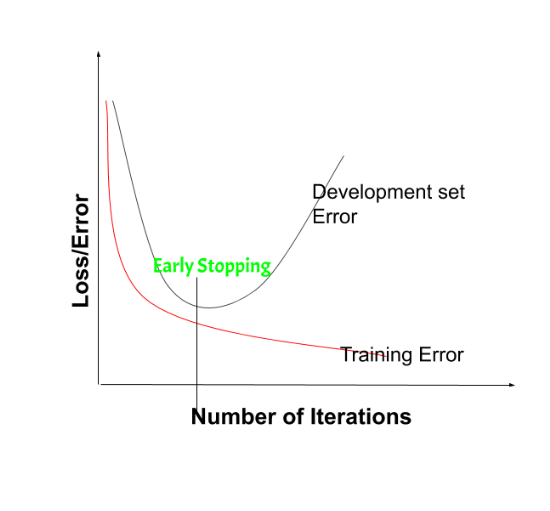

### ⚙️ Key Parameters

- Patience: Number of epochs to wait for improvement in validation performance before stopping. Usually 5–10 epochs.
  
- Monitor Metric: The metric to track during training, often validation loss or validation accuracy.

  
- Restore Best Weights: After stopping, the model reverts to the weights from the epoch with the best validation performance.


### 🛠️ How Early Stopping Works

1. Monitor Validation Performance: The model is evaluated on the validation set during training.
   
2. Track Validation Loss/Accuracy: This metric indicates how well the model generalizes.

   
3. Stop When Performance Stops Improving: If the validation loss stops decreasing or starts increasing after a set number of epochs, training is halted.

   
4. Restore Best Model: The model restores the weights from the epoch with the lowest validation loss for optimal performance.


### 💡 Implementing Early Stopping

1. Use a Separate Validation Set: Ensures unbiased evaluation.
   
2. Define Metric to Monitor: Usually validation loss or validation accuracy.

   
3. Set Patience: Number of epochs to wait for improvement before stopping.

   
4. Use Framework Callbacks: Libraries like TensorFlow, Keras, and PyTorch provide built-in callbacks for easy integration.


### 🌟 Benefits

- Reduces Overfitting: Stops training before the model overfits.
  
- Saves Computational Resources: Avoids unnecessary training.

  
- Improves Efficiency: Achieves better performance in fewer epochs.

  
- Easy to Implement: Simple using built-in tools in modern frameworks.


### ⚠️ Limitations

- Risk of Underfitting: Stopping too early may prevent the model from learning patterns fully.
  
- Not Always Suitable: Complex models may need longer training to reach optimal performance.

  
- Dependent on Validation Set: Poorly chosen or small validation sets can mislead stopping decisions.

  
- Some Computational Overhead: Monitoring validation metrics can add cost, especially for large datasets.


| **Technique** | **Purpose** | **Best For** | **Key Benefit** |
| --- | --- | --- | --- |
| **L1 Regularization** | Feature selection | Sparse models | Eliminates irrelevant features |
| **L2 Regularization** | Weight decay | Dense models | Prevents large weights |
| **Dropout** | Preventing neuron co-adaptation | Deep neural networks | Improves generalization |
| **Data Augmentation** | Increasing dataset diversity | Image data | Reduces overfitting |
| **Early Stopping** | Preventing overtraining | All models | Saves time and resources |


In [55]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images and normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)
datagen.fit(x_train)

# Build the model
model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',     # Track validation loss
    patience=2,             # Wait 2 epochs for improvement
    restore_best_weights=True
)

# Train the model with early stopping, only 5 epochs max
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128, subset='training'),
    validation_data=datagen.flow(x_train, y_train, batch_size=128, subset='validation'),
    epochs=5,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 139ms/step - accuracy: 0.7333 - loss: 0.8210 - val_accuracy: 0.9137 - val_loss: 0.3090
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 64s 169ms/step - accuracy: 0.8727 - loss: 0.4088 - val_accuracy: 0.9320 - val_loss: 0.2264
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 137ms/step - accuracy: 0.8969 - loss: 0.3314 - val_accuracy: 0.9450 - val_loss: 0.1872
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - accuracy: 0.9111 - loss: 0.2923 - val_accuracy: 0.9526 - val_loss: 0.1604
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 130ms/step - accuracy: 0.9173 - loss: 0.2703 - val_accuracy: 0.9530 - val_loss: 0.1558
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9743 - loss: 0.0805
Test Accuracy: 0.9743000268936157


## Explanation

### 1. Import Libraries

- tensorflow → For building and training deep learning models.
  
- Sequential, Dense, Dropout, Flatten → Layers to construct your neural network.

  
- mnist → Dataset of handwritten digits.

  
- to_categorical → Converts labels into one-hot encoding.

  
- ImageDataGenerator → For real-time data augmentation.


### 2. Load Dataset

- mnist.load_data() loads MNIST dataset into training and testing sets: (x_train, y_train), (x_test, y_test).
  
- x_train and x_test → Images of shape (28,28) (grayscale).

  
- y_train and y_test → Labels (0–9).


### 3. Preprocess Data

- x_train.reshape(-1, 28, 28, 1) → Reshape to (samples, height, width, channels) required by Keras.
  
- / 255.0 → Normalize pixel values to range [0,1].

  
- to_categorical → Convert labels to one-hot vectors for multiclass classification.


### 4. Data Augmentation

- ImageDataGenerator applies real-time transformations to the images during training:
    - rotation_range=15 → Rotate images ±15°.
      
    - width_shift_range=0.1 → Shift horizontally by 10%.
 
      
    - height_shift_range=0.1 → Shift vertically by 10%.
 
      
    - zoom_range=0.1 → Zoom in/out by 10%.
 
      
    - validation_split=0.2 → Reserve 20% of training data for validation.
 
      
- datagen.fit(x_train) → Initializes the generator (needed for some datasets).


### 5. Build Neural Network

- Flatten(input_shape=(28,28,1)) → Converts 2D image into 1D vector of 784 features.
  
- Dense(512, activation='relu') → Fully connected layer with 512 neurons and ReLU activation.

  
- Dropout(0.5) → Randomly drops 50% of neurons to prevent overfitting.

  
- Dense(256, activation='relu') → Second dense layer with 256 neurons.

  
- Dropout(0.3) → Drops 30% of neurons.

  
- Dense(10, activation='softmax') → Output layer for 10 classes (digits 0–9).


### 6. Compile Model

- optimizer='adam' → Adaptive optimizer for faster convergence.
  
- loss='categorical_crossentropy' → Suitable for multi-class classification.

  
- metrics=['accuracy'] → Track accuracy during training.


### 7. Early Stopping Callback

- Stops training when validation performance stops improving:
    - monitor='val_loss' → Tracks validation loss.
      
    - patience=2 → Waits 2 epochs for improvement before stopping.
 
      
    - restore_best_weights=True → Loads the best model weights after stopping.


### 8. Train Model

- model.fit() uses the augmented data:
    - datagen.flow(x_train, y_train, subset='training') → Training generator.
      
    - validation_data=datagen.flow(x_train, y_train, subset='validation') → Validation generator.
 
      
    - epochs=5 → Train at most 5 epochs (can stop earlier due to early stopping).
 
      
    - callbacks=[early_stop] → Enables early stopping during training.


### 9. Evaluate Model

- model.evaluate(x_test, y_test) → Test model on unseen data.
  
- print("Test Accuracy:", test_acc) → Display final accuracy on test set.

---

---

# 4. Batch Normalization 🏗️

Batch Normalization is a technique used in deep learning to standardize the inputs of each layer in a neural network. By normalizing these inputs, BN helps stabilize the learning process and allows for faster convergence, making training more effective and reducing the need for careful initialization and learning rate tuning 

## 🤔 Need of Batch Normalization

Batch Normalization makes sure outputs of each layer stay steady as model learns. This helps model train faster and learn more effectively.

- Solves the problem of internal covariate shift.
  
- Makes training faster and more stable.

  
- Allows use of higher learning rates.

  
- Helps avoid vanishing or exploding gradients.

  
- Can act like a regularizer sometimes reduce the need for dropout.

## ⚙️ How Does It Work?

1. Normalization: For each mini-batch, BN computes the mean and variance of the inputs. It then normalizes the inputs by subtracting the mean and dividing by the standard deviation.
   
2. Scaling and Shifting: After normalization, BN applies two learnable parameters gamma (γ) and beta (β) to scale and shift the normalized values. This allows the network to maintain the representation power of the model

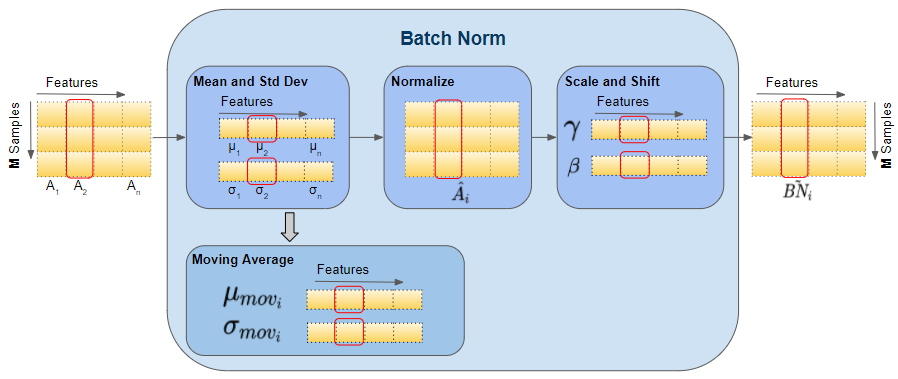

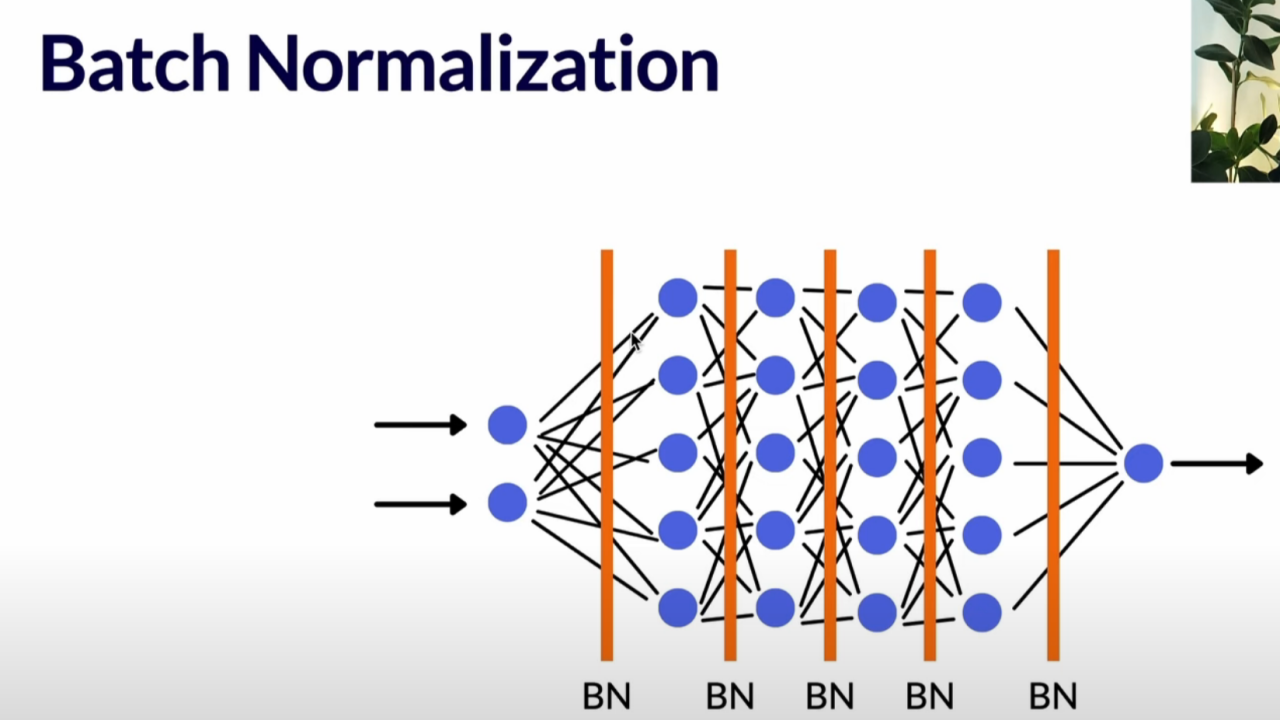 

## 🧪 Practical Considerations

- Placement: BN is typically applied after the linear transformation (e.g., convolution or fully connected layer) and before the activation function.
  
- Mini-Batch Size: The effectiveness of BN can depend on the mini-batch size. Very small batches may lead to noisy estimates of the mean and variance.

  
- Training vs. Inference: During training, BN uses the statistics of the current mini-batch. During inference, it uses the running averages of these statistics accumulated during training.

### 🧠 Normalizes Inputs to Each Layer

Batch Normalization (BN) standardizes the inputs to each layer in a neural network. This means it ensures that the input values have a mean of 0 and a variance of 1 (roughly), which stabilizes the distribution of data flowing through the network.

**Why it matters:**

- Prevents sudden changes in input distributions for deeper layers (called internal covariate shift) .
  
- Makes the network more stable during training, so each layer doesn’t have to constantly adapt to wildly changing inputs.

  
- Helps the network learn faster and more reliably.


### ⚡ Helps with Faster Convergence

By normalizing inputs, BN allows the network to use higher learning rates safely and reduces the chances of getting stuck during training.

**Why it matters:**

- Training becomes faster  because the network parameters can move more confidently in the right direction.
  
- Reduces the need for very careful weight initialization or complex learning rate schedules.

  
- Mitigates issues like vanishing or exploding gradients, leading to smoother optimization.

## 📌 Summary

Batch Normalization is a powerful technique that standardizes the inputs to each layer, reduces internal covariate shift, accelerates convergence, improves gradient flow, and acts as a regularizer. By incorporating BN into your neural network architectures, you can achieve more stable and efficient training processes.

In [58]:
!pip install torch torchvision torchaudio


  Using cached torch-2.8.0-cp312-cp312-win_amd64.whl.metadata (30 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
Using cached torch-2.8.0-cp312-cp312-win_amd64.whl (241.3 MB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 1.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 1.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 1.6 MB/s  0:00:01
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.5 MB 1.7 MB/s eta 0:00:02
   ---------------

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 🔹 Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 🔹 Build a simple MLP with Batch Normalization
model = Sequential([
    Flatten(input_shape=(28,28)),              # Flatten 28x28 images
    Dense(128, activation='relu'),             # Fully connected layer
    BatchNormalization(),                       # Batch Normalization layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')            # Output layer
])

# 🔹 Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 🔹 Train the model
history = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    epochs=10, 
                    batch_size=64)

# 🔹 Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9210 - loss: 0.2700 - val_accuracy: 0.9643 - val_loss: 0.1315
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9661 - loss: 0.1138 - val_accuracy: 0.9670 - val_loss: 0.1078
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9750 - loss: 0.0805 - val_accuracy: 0.9681 - val_loss: 0.1002
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9800 - loss: 0.0624 - val_accuracy: 0.9714 - val_loss: 0.0979
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accuracy: 0.9725 - val_loss: 0.0976
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9861 - loss: 0.0416 - val_accuracy: 0.9705 - val_loss: 0.1011
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9883 - loss: 0.0362 - val_accuracy: 0.9719 - val_loss: 0.1001
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9889 - loss: 0.0342 - val_accuracy: 0


### 1️⃣ Training Accuracy vs. Validation Accuracy

- Your training accuracy reaches 99.16% by the 10th epoch ✅.
- Your validation accuracy hovers around 97.31–97.73%.

Insight:

- The model is performing very well on the training set.
- The gap between training and validation accuracy (~2%) is small, which is good. It indicates no severe overfitting.
- Validation accuracy slightly fluctuates, which is normal due to mini-batch randomness.


### 2️⃣ Training Loss vs. Validation Loss

- Training loss decreases steadily from 0.27 → 0.0249, showing the model is learning and fitting the training data.
- Validation loss decreases initially (0.1315 → 0.0976 by epoch 5) but then fluctuates slightly (0.1011 → 0.0981).

Insight:

- The validation loss doesn’t decrease as smoothly as training loss. This is common and indicates the model has learned most patterns early, and now minor fluctuations are due to unseen data variability.
- No big jump in validation loss, so again, overfitting is minimal.


### 3️⃣ Test Accuracy

- Test accuracy = 97.60% ✅

Insight:

- Model generalizes very well to unseen data.
- This confirms that Batch Normalization and the architecture helped stabilize training and avoid overfitting.


### 4️⃣ Epoch-by-Epoch Observation

- Rapid improvements in the first 3–5 epochs: training accuracy jumps from 92% → 98%, validation from 96% → 97%.
- After epoch 5, gains are smaller; this is typical diminishing returns: model has captured most useful patterns.

Takeaway:

- Could stop training around epoch 7–8 with minimal loss in accuracy, saving time (Early Stopping could help here).

---

---

# 5. Learning Rate Schedulers ⚡


At the core of successful model training is the learning rate, a key hyperparameter that controls the size of each step during optimization. PyTorch offers a powerful tool called the learning rate scheduler, which automatically adjusts the learning rate as training progresses. Integrating a scheduler into your training pipeline is straightforward and flexible. Essentially, the scheduler works alongside the optimizer, modifying the learning rate according to predefined rules. Typically, you first define an optimizer and a scheduler, then update the learning rate at each epoch or batch as needed. This flexibility allows users to fine-tune the scheduler’s behavior to match the specific demands of their training process.

## ⚡ Parameters and their Significance

- optimizer: Establishes the connection between the PyTorch learning rate scheduler and the optimizer responsible for updating the model parameters.
  
- step_size: Dictates the number of epochs between each adjustment of the learning rate, influencing how often the learning rate is updated during training.

  
- gamma: Scales the learning rate after each step, controlling the rate at which the learning rate decays or grows.

  
- last_epoch: A parameter that aids in resuming training from a specific epoch, providing flexibility in model development and training management.

## 🔹 Need for Learning Rate Scheduler

Learning rate schedulers are essential because model training is dynamic and the loss landscape is often complex. Using a fixed learning rate can slow down convergence or even cause the optimizer to overshoot minima. Learning rate schedulers tackle this problem by adjusting the learning rate based on the model’s performance during training. This adaptability helps:

- ⚡ Prevent Divergence: Reduces the risk of the model bouncing around the optimal solution.
  
- 🏃‍♂️ Accelerate Convergence: Enables faster progress toward the minimum of the loss function.

  
- 🎯 Find Optimal Parameters: Helps the optimizer fine-tune weights to achieve better overall performance.

## ✅ Benefits of Using Learning Rate Schedulers

- Faster Convergence: By adjusting the learning rate, the model can converge more quickly.

- Avoiding Local Minima: Schedulers like CyclicLR and OneCycleLR help the model escape local minima.

- Improved Accuracy: Dynamic adjustment of the learning rate can lead to better model performance.

- Efficient Training: Schedulers can help in utilizing the computational resources effectively by adjusting the learning rate.



## 🔧 Common Learning Rate Schedulers in PyTorch

### 1. StepLR

- Description: Reduces the learning rate by a factor (gamma) every specified number of epochs (step_size).

- Use Case: Useful when you want to decay the learning rate at fixed intervals.



In [61]:
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)


### 2. MultiStepLR

- Description: Reduces the learning rate by a factor (gamma) at specified epochs (milestones).

- Use Case: Ideal when you want to decay the learning rate at specific points during training.



In [62]:
from torch.optim.lr_scheduler import MultiStepLR
scheduler = MultiStepLR(optimizer, milestones=[30, 80], gamma=0.1)


### 3. ExponentialLR

- Description: Reduces the learning rate by a multiplicative factor (gamma) every epoch.

- Use Case: Suitable for scenarios where a gradual decay of the learning rate is desired.



In [63]:
from torch.optim.lr_scheduler import ExponentialLR
scheduler = ExponentialLR(optimizer, gamma=0.9)


### 4. CosineAnnealingLR

- Description: Adjusts the learning rate following a cosine curve, decreasing it to a minimum value and then restarting.

- Use Case: Effective in training models like Restormer for image restoration and ResNet++ in image classification.

In [64]:
from torch.optim.lr_scheduler import CosineAnnealingLR
scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)


### 5. ReduceLROnPlateau

- Description: Reduces the learning rate when a specified metric has stopped improving.

- Use Case: Ideal when you want to adjust the learning rate based on validation performance.



In [65]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)


## ⚡📉 Step decay, ReduceLROnPlateau, Cosine Annealing

## 1. Step Decay: ⬇️

### Characteristics:

- Reduces the learning rate in discrete steps at predefined intervals.
- Effective for stable training tasks, such as image classification with deep CNNs.

### Best Used When:

- Training involves clear plateaus where progress slows after a certain number of epochs.
- You have long training runs and want to stabilize learning near convergence.

### Drawbacks:

- The abrupt reductions can sometimes destabilize training or lead to premature convergence.

## 2. Cyclical Learning Rates (CLR)🔄

### Characteristics:

- Learning rate oscillates between a minimum and maximum bound.
- Allows the model to explore and exploit during training.

### Best Used When:

- You’re unsure of the best learning rate, as CLR allows you to test a range of values during training.
- You want to prevent the model from getting stuck in sharp local minima.
- Useful for tasks requiring fine-tuning, such as transfer learning.

### Drawbacks:

- Requires careful tuning of bounds and cycle length.
- May increase training time slightly, as it promotes oscillation over rapid convergence.

## 3. Cosine Annealing 🌙

### Characteristics:

- Gradually decreases the learning rate following a cosine curve.
- Particularly effective for tasks where smooth and precise convergence is required.

### Best Used When:

- Training large language models (LLMs) or transformers where fine convergence impacts downstream tasks.
- Performing pretraining or fine-tuning, where stability is critical.

### Drawbacks:

- Not ideal for datasets with high variance or where rapid progress in early epochs is required.
- Sensitive to the choice of T, the total number of steps.


## 4. ReduceLROnPlateau 📉

### Characteristics:

- Reduces the learning rate when a monitored metric stops improving (like validation loss or accuracy).
- The reduction is adaptive, not fixed to epochs or cycles.
- Often used with a factor (how much to reduce) and patience (how many epochs to wait before reducing).

### Best Used When:

- You want automatic learning rate adjustment based on model performance rather than predefined schedules.
- Training complex models where the optimal learning rate is not known in advance.
- Useful for fine-tuning or transfer learning, where the model might plateau after initial rapid improvements.

### Drawbacks:

- Requires careful selection of patience and factor; too small can reduce learning rate prematurely, too large may delay adaptation.
- Works reactively, so it may take a few epochs to respond to stagnation.

## Comparison of Learning Rate Schedulers 📝

| **Scheduler** | **Behavior** | **When to Use** | **Pros** | **Cons** | **Visual Pattern** |
| --- | --- | --- | --- | --- | --- |
| **Step Decay**  | Reduces LR in **discrete steps** after fixed epochs | Stable training tasks, long runs, when you expect plateaus | Simple, predictable | Abrupt changes can destabilize, may converge prematurely | Staircase-like drop |
| **Cyclical LR (CLR)** | LR oscillates between **min & max bounds** | Uncertain best LR, transfer learning, fine-tuning | Explores LR space, avoids local minima | Requires careful tuning, slightly longer training | Sinusoidal / triangular pattern |
| **Cosine Annealing**  | Gradually decreases LR **following a cosine curve** | Smooth convergence, LLMs, transformers, pretraining | Smooth, precise convergence | Not ideal for high-variance datasets, sensitive to total steps | Smooth cosine-shaped decay |
| **ReduceLROnPlateau**  | Reduces LR **when metric plateaus** | Auto-adjust LR based on performance, fine-tuning | Adaptive, saves manual tuning | Reactive, may take a few epochs to respond, requires patience/factor tuning | Irregular drops triggered by plateau |

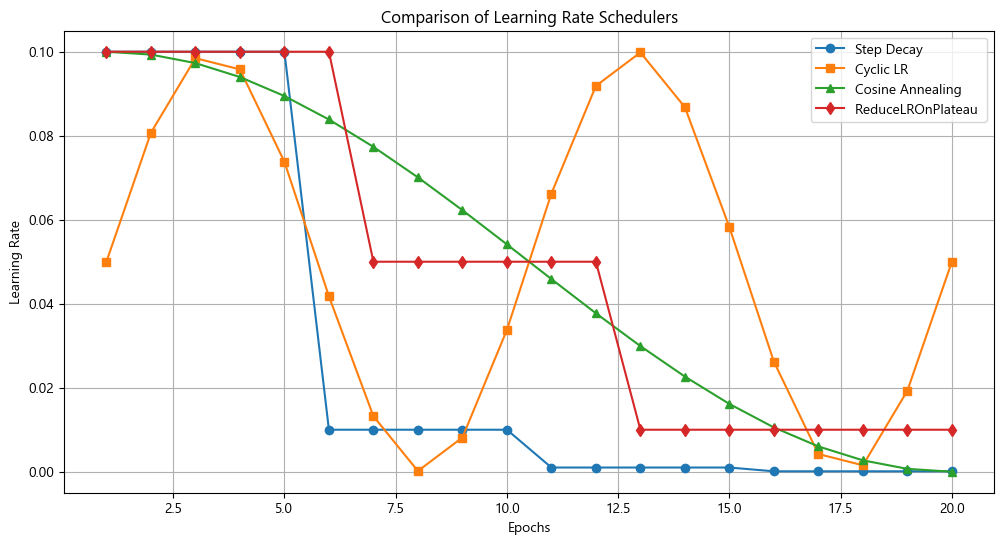

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# X-axis (epochs)
epochs = np.arange(1, 21)

# Example learning rate values for illustration
step_decay = [0.1]*5 + [0.01]*5 + [0.001]*5 + [0.0001]*5
cyclic_lr = 0.05 + 0.05 * np.sin(np.linspace(0, 4*np.pi, 20))
cosine_annealing = 0.1 * (1 + np.cos(np.linspace(0, np.pi, 20))) / 2
reduce_on_plateau = [0.1]*6 + [0.05]*6 + [0.01]*8  # Simplified plateau behavior

# Plotting
plt.figure(figsize=(12,6))
plt.plot(epochs, step_decay, label='Step Decay ', marker='o')
plt.plot(epochs, cyclic_lr, label='Cyclic LR ', marker='s')
plt.plot(epochs, cosine_annealing, label='Cosine Annealing ', marker='^')
plt.plot(epochs, reduce_on_plateau, label='ReduceLROnPlateau ', marker='d')

# Labels and Title
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Comparison of Learning Rate Schedulers')
plt.legend()
plt.grid(True)
plt.show()


## Explanation

- Import Libraries:

    - matplotlib.pyplot for plotting graphs.

    - numpy for numerical operations and creating arrays.

- X-axis Values (Epochs):

    - epochs = np.arange(1, 21) creates an array of 20 epochs [1, 2, ..., 20] for plotting.

- Learning Rate Examples (simulated for visualization):

    - step_decay: LR drops sharply every 5 epochs → [0.1]*5 + [0.01]*5 + [0.001]*5 + [0.0001]*5.

    - cyclic_lr: LR oscillates smoothly between 0.05 and 0.1 using a sine function → 0.05 + 0.05 * np.sin(...).

    - cosine_annealing: LR decays gradually following a cosine curve → 0.1 * (1 + cos(...))/2.

    - reduce_on_plateau: LR drops when a metric plateaus → [0.1]*6 + [0.05]*6 + [0.01]*8.

- Plotting the Curves:

    - plt.figure(figsize=(12,6)) sets a wide figure for clarity.

- plt.plot(..., label=..., marker=...) draws each scheduler line with markers:

    - Step Decay → circles (o)

    - Cyclic LR → squares (s)

    - Cosine Annealing → triangles (^)

    - ReduceLROnPlateau → diamonds (d)

- Labels & Title:

    - plt.xlabel('Epochs') → labels x-axis.

    - plt.ylabel('Learning Rate') → labels y-axis.

    - plt.title('Comparison of Learning Rate Schedulers') → main plot title.

- Legend & Grid:

    - plt.legend() shows the labels for each curve.

    - plt.grid(True) adds gridlines for better readability.

- Display Plot:

    - plt.show() renders the plot on screen.

---

---

# 6. **Evaluation metrics** 📊

When developing machine learning models, it’s crucial to gauge their performance accurately. Evaluation metrics provide a way to measure how effective a model is. Whether you’re tackling a classification task, predicting continuous values, or performing clustering, choosing the appropriate metric helps determine how well your model achieves its objectives. In this guide, we’ll explore commonly used evaluation metrics and explain how to select the most suitable one for your model.

## Classification Metrics

Classification problems aim to predict discrete categories. To evaluate the performance of classification models, we use the following metrics:

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **Confusion Matrix**

### **1. Confusion Matrix 🧩**

A confusion matrix is a table that summarizes predictions vs actual labels. It shows:

|  | Predicted Positive | Predicted Negative |
| --- | --- | --- |
| **Actual Positive** | True Positive (TP) ✅ | False Negative (FN) ❌ |
| **Actual Negative** | False Positive (FP) ❌ | True Negative (TN) ✅ |
- **TP**: Model correctly predicts positive.
- **TN**: Model correctly predicts negative.
- **FP**: Model predicts positive but it’s actually negative → “Type I error.”
- **FN**: Model predicts negative but it’s actually positive → “Type II error.”

**Why important?**

- Provides a detailed view of where your model is making mistakes.
- All other metrics (accuracy, precision, recall, F1) are derived from it.

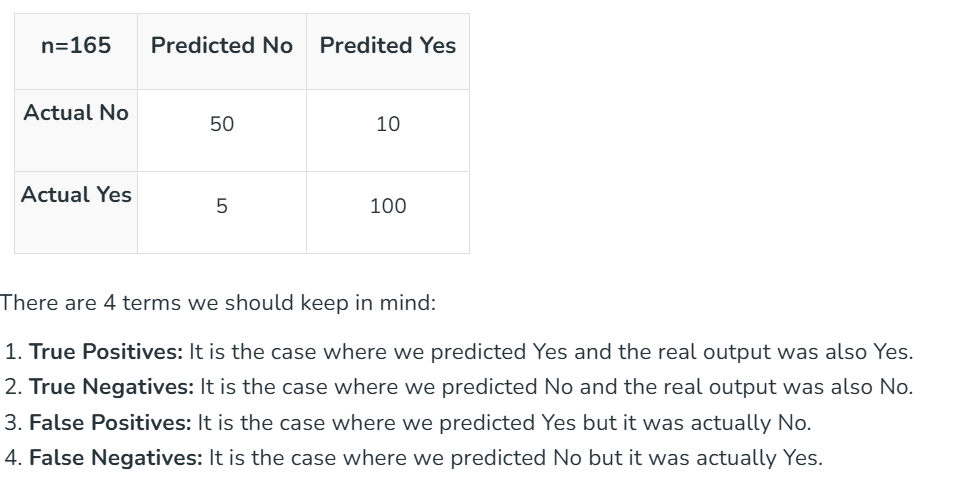

### 2.  Accuracy 🎯

Accuracy is a fundamental metric used for evaluating the performance of a classification model. It tells us the proportion of correct predictions made by the model out of all predictions.

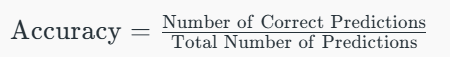

- Intuition: “How often is my model right overall?”

- Good for: Balanced datasets.

- Limitation: Misleading if classes are imbalanced (e.g., 95% negative, 5% positive — predicting all negative gives 95% accuracy but useless model).

### 3. Precision ✨

It measures how many of the positive predictions made by the model are actually correct. It's useful when the cost of false positives is high such as in medical diagnoses where predicting a disease when it’s not present can have serious consequences.
**

- Intuition: “When my model says positive, how trustworthy is it?”
- Good for: Scenarios where false positives are costly (spam detection, disease diagnosis).

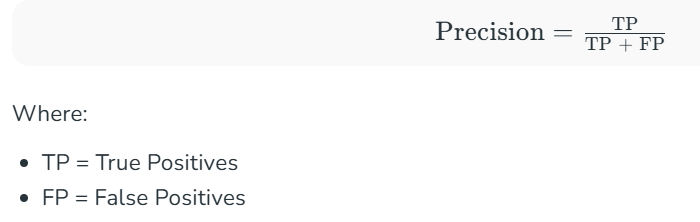

Example:

- Model predicts 10 emails as spam → 8 are actually spam, 2 are not.
- Precision = 8/10 = 0.8 → 80% of spam predictions are correct.

### 4. Recall (Sensitivity / True Positive Rate) 🔍

Recall or Sensitivity measures how many of the actual positive cases were correctly identified by the model. It is important when missing a positive case (false negative) is more costly than false positives.

- Intuition: “How good is my model at capturing all the positives?”
- Good for: Scenarios where missing a positive is costly (cancer detection, fraud detection).

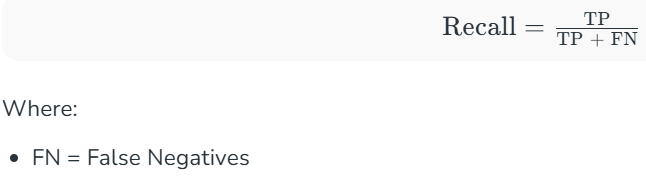

Example:

- 20 actual spam emails, model detects 15 → Recall = 15/20 = 0.75 → 75% of spam detected.

### **5. F1 Score ⚖️**

The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both. It’s particularly useful when you want to ensure that your model performs well in terms of both precision and recall. A higher F1 score indicates better overall performance, and its value ranges from 0 to 1.

If recall is low but precision is high, the model may appear accurate but will miss many true instances. A higher F1 score reflects stronger, more balanced performance. Mathematically, it can be represented as:

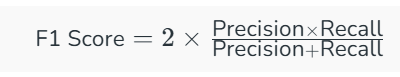

- **Intuition:** “A single metric to capture both correctness (precision) and completeness (recall).”
- **Good for:** Imbalanced datasets or when both false positives and false negatives matter.
- **Range:** 0 → 1 (1 is perfect).




| **Metric** | **Definition** |  | **Intuition** | **Pros** | **Cons / Limitations** | **Best Use Case** |
| --- | --- | --- | --- | --- | --- | --- |
| **Confusion Matrix 🧩** | Table showing correct vs incorrect predictions |  | Shows TP, TN, FP, FN counts | Detailed analysis of errors | Doesn’t give a single number; hard to compare directly | Any classification problem; base for all other metrics |
| **Accuracy 🎯** | Fraction of total correct predictions |  | “How often is my model right overall?” | Simple, easy to understand | Misleading for imbalanced data | Balanced datasets |
| **Precision ✨** | Fraction of predicted positives that are actually positive |  | “When model says positive, how often is it right?” | Good when false positives are costly | Ignores false negatives | Spam detection, disease diagnosis (when FP costly) |
| **Recall (Sensitivity) 🔍** | Fraction of actual positives that are correctly identified |  | “How good is my model at catching all positives?” | Good when missing positives is costly | Ignores false positives | Cancer detection, fraud detection (when FN costly) |
| **F1 Score ⚖️** | Harmonic mean of precision and recall |  | Balances precision and recall in one number | Works well for imbalanced datasets | Can be less interpretable than accuracy | Fraud detection, imbalanced datasets, when both FP & FN matter |

---

Confusion Matrix:
[[3 1]
 [1 5]]

TP = 5, TN = 3, FP = 1, FN = 1

Accuracy: 0.80
Precision: 0.83
Recall: 0.83
F1 Score: 0.83


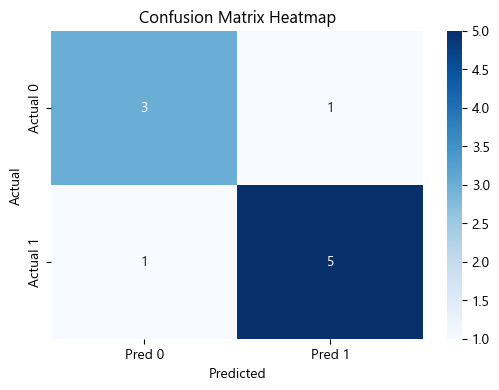

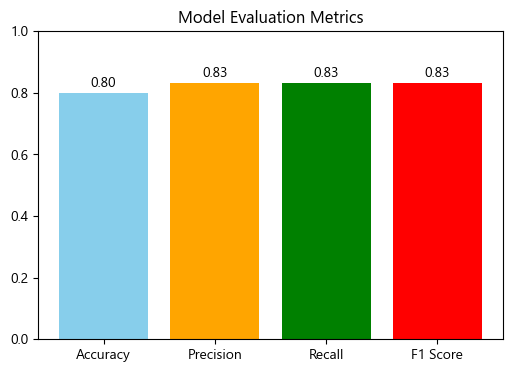

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_true = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1])   # Actual labels
y_pred = np.array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1])   # Predicted labels

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nTP = {}, TN = {}, FP = {}, FN = {}".format(cm[1,1], cm[0,0], cm[0,1], cm[1,0]))

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# ---- Plot Confusion Matrix ----
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred 0","Pred 1"], yticklabels=["Actual 0","Actual 1"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ---- Plot Metrics ----
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6,4))
bars = plt.bar(metrics, values, color=['skyblue','orange','green','red'])
plt.ylim(0,1)
plt.title("Model Evaluation Metrics")

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha="center", fontsize=10)

plt.show()


## Explantion of output

### 🧩 Confusion Matrix:

- TN = 3 → correctly predicted negatives

- FP = 1 → predicted positive but actually negative

- FN = 1 → predicted negative but actually positive

- TP = 5 → correctly predicted positives

### 🎯 Accuracy:

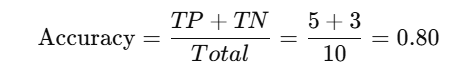

→ Model is correct 80% of the time.

### ✨ Precision:

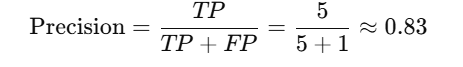

→ 83% of positive predictions are correct.

### 🔍Recall:

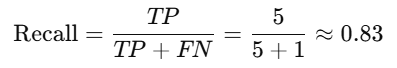

→ Model correctly identifies 83% of all actual positives.

### ⚖️ F1 Score:

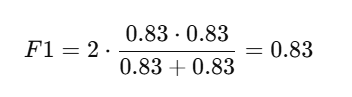

→ Balanced measure of precision and recall.

---

# **MATHS**

# 🧠 L2 Regularization:

## 1. What is L2 Regularization?

- L2 Regularization is a technique to prevent overfitting in machine learning models.
- It penalizes large weights in your model by adding a term to the loss function.
- This encourages the model to learn smaller, more generalized weights, which prevents it from fitting the noise in the training data.


## 2. The Math Behind L2 🌀

If your original loss function is Lossoriginal, L2 adds a penalty proportional to the sum of squares of all weights:

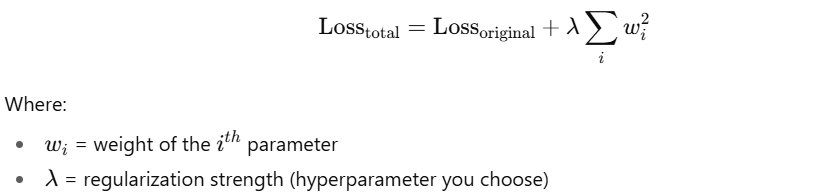

- Large λ → strong penalty → smaller weights → higher bias
- Small λ → weak penalty → can still overfit → lower bias, higher variance

> ⚡ Intuition: Squaring the weights means larger weights get penalized more heavily. So the model “prefers” smaller weights that are less likely to overfit.
>

## 3. Gradient Update with L2 (Weight Decay) ⚡

For a weight wi, gradient descent update without regularization:

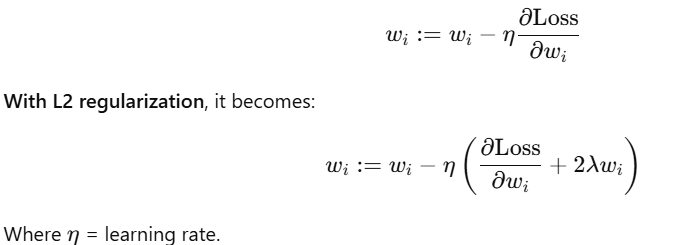

- You can see that each weight is shrunk slightly toward zero in each step, which is why it’s also called weight decay.

## 4. Why L2 Regularization Works 🛡️

1. Prevents Overfitting:
    - Large weights can make the model extremely sensitive to small fluctuations in training data.
      
    - Penalizing large weights reduces this sensitivity.
  
      
2. Smooth Solutions:

   
    - L2 encourages smaller weights → smoother predictions → better generalization.
      
3. Stability in Learning:
    - Helps in neural networks by reducing extreme activations which can destabilize training.

---

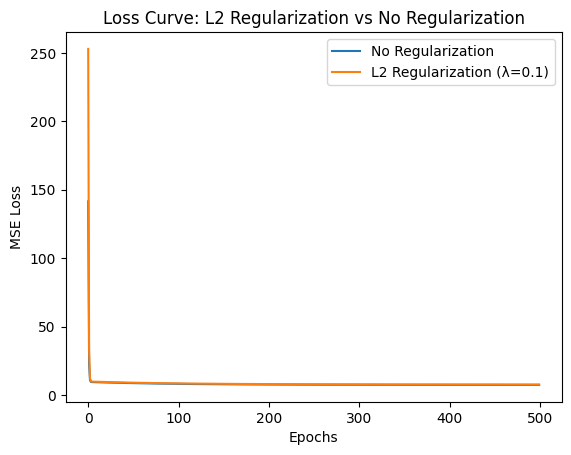

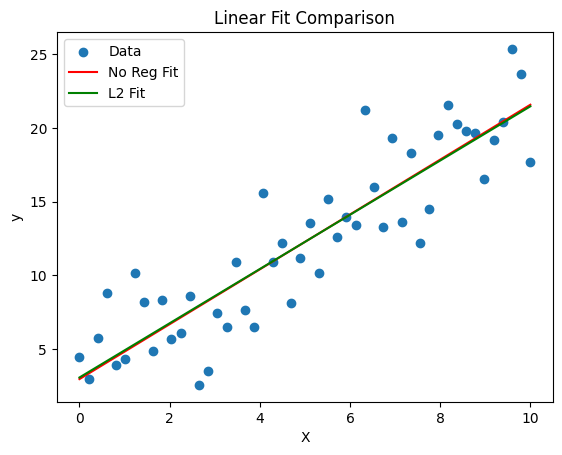

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Create some noisy linear data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1,1)
y = 2*X.flatten() + 3 + np.random.randn(50)*3  # y = 2x + 3 + noise

# 🔹 Gradient Descent Settings
lr = 0.01
epochs = 500
lambda_reg = 0.1

# 🔹 Initialize weights
w_no_reg = np.random.randn(1)
b_no_reg = 0.0

w_l2 = np.random.randn(1)
b_l2 = 0.0

# 🔹 Store losses
losses_no_reg = []
losses_l2 = []

for epoch in range(epochs):
    # --- No regularization ---
    y_pred_no_reg = X.dot(w_no_reg) + b_no_reg
    error_no_reg = y_pred_no_reg - y
    loss_no_reg = np.mean(error_no_reg**2)
    losses_no_reg.append(loss_no_reg)

    dw_no_reg = (2/X.shape[0]) * (X.T.dot(error_no_reg))
    db_no_reg = (2/X.shape[0]) * np.sum(error_no_reg)

    w_no_reg -= lr * dw_no_reg
    b_no_reg -= lr * db_no_reg

    # --- With L2 regularization ---
    y_pred_l2 = X.dot(w_l2) + b_l2
    error_l2 = y_pred_l2 - y
    loss_l2 = np.mean(error_l2**2) + lambda_reg * np.sum(w_l2**2)
    losses_l2.append(loss_l2)

    dw_l2 = (2/X.shape[0]) * (X.T.dot(error_l2)) + 2*lambda_reg*w_l2
    db_l2 = (2/X.shape[0]) * np.sum(error_l2)

    w_l2 -= lr * dw_l2
    b_l2 -= lr * db_l2

# 🔹 Plot losses
plt.plot(losses_no_reg, label="No Regularization")
plt.plot(losses_l2, label="L2 Regularization (λ=0.1)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Curve: L2 Regularization vs No Regularization")
plt.legend()
plt.show()

# 🔹 Plot final fit
plt.scatter(X, y, label="Data")
plt.plot(X, X*w_no_reg + b_no_reg, label="No Reg Fit", color='r')
plt.plot(X, X*w_l2 + b_l2, label="L2 Fit", color='g')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Fit Comparison")
plt.legend()
plt.show()


## Insight

- Loss curves – L2 regularization converges smoother and often slightly higher loss (weights are restrained).

- Fit lines – The line with L2 is less extreme; without L2, the model may chase noise, overfitting slightly.

---

# 🔥 Dropout expectation:

## 1. What is Dropout? 🤖

- Dropout is a regularization technique used in neural networks to prevent overfitting.
- The main idea: randomly turn off (drop) neurons during training, forcing the network to learn redundant and robust features.

> Think of it like training multiple smaller subnetworks inside the main network at once.
>

## 2. Dropout During Training 🏋️‍♂️

- During training, for each neuron in the network:
    - Keep it active with probability p (called keep probability).
    - Set it to 0 with probability 1−p

**Mathematically:**

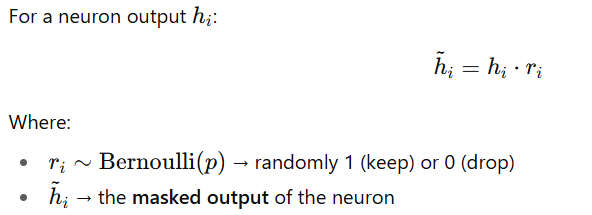

- Effect:
    - Prevents co-adaptation of neurons (neurons cannot rely on specific other neurons).
    - Forces the network to spread learning across multiple neurons.

## 3. Dropout During Inference (Testing/Prediction) 🔍

- During inference, we don’t drop neurons.
- Instead, we scale the activations by the keep probability p so that the expected output matches training.

**Mathematically:**

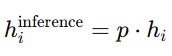

- This ensures that the mean output of each neuron is the same as during training.

- It keeps the network consistent between training and testing.

## 4. Intuition 💡

- During training: network behaves like an ensemble of many smaller networks, learning diverse features.
- During inference: all neurons are active, but scaled → behaves like the average of all these subnetworks.

> ⚡ Key Insight: Dropout makes the model robust and less likely to overfit without adding too much computational cost.
>


---

In [2]:
import torch
import torch.nn as nn

# Dropout with p=0.2
drop = nn.Dropout(p=0.2)
x = torch.tensor([1.0, 2.0, 3.0])

drop.train()   # Training mode
out_train = drop(x)  # Randomly drops neurons

drop.eval()    # Inference mode
out_infer = x   # All neurons active

print("Training output:", out_train)
print("Inference output:", out_infer)


Training output: tensor([0.0000, 2.5000, 3.7500])
Inference output: tensor([1., 2., 3.])


---

# 🧮 Batch Norm equation: 

## 1. What is Batch Normalization?🤖

- Batch Norm is a technique to normalize the inputs of each layer in a neural network.

- It stabilizes and accelerates training by reducing internal covariate shift, i.e., the change in the distribution of layer inputs during training.

- Introduced by Ioffe and Szegedy (2015).

## 2. Why Batch Norm? ⚡

- Allows the use of higher learning rates without divergence.

- Acts as a mild regularizer, sometimes reducing the need for Dropout.
                                                         
- Speeds up convergence by keeping activations in a standard range.


## 3. Batch Norm Equation 📝

For a mini-batch of inputs {x1,x2,...,xm} to a layer:

### 1. Compute batch mean and variance:

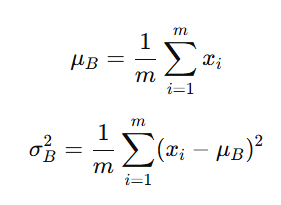

### 2. Normalize each input:

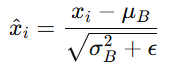

ϵ is a small constant to avoid division by zero.

### 3. Scale and shift (learnable parameters):

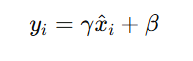

Where:

- 𝛾 → scales the normalized value (learnable)

- 𝛽 → shifts the normalized value (learnable)

- 𝑦𝑖 → final output of Batch Norm layer

## 4. Intuition 💡

- Normalization: Keeps activations centered around 0 and with unit variance.
  
- Scaling & Shifting: Allows the network to recover the original representation if needed.

  
- Effect: Reduces covariate shift → network trains faster and more stable.

## 5. Key Benefits 🏆

- Faster convergence, can use higher learning rates.

- Helps reduce sensitivity to weight initialization.

- Slightly regularizes the model, can reduce overfitting.

- Often used before or after activation functions in modern architectures.

## 6. Summary Table 📊

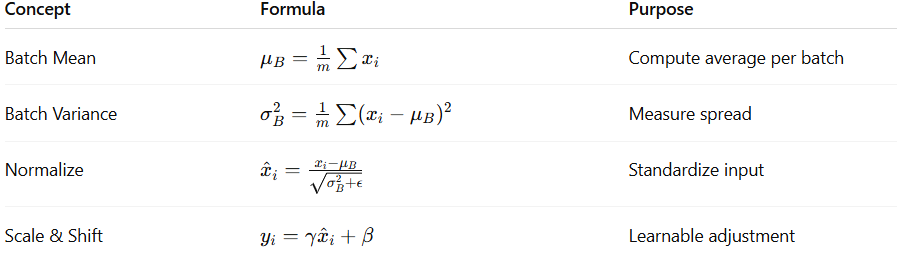

---